In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg")
from spacy.matcher import Matcher
from spacy.matcher import DependencyMatcher
from spacy.tokens import Span
from spacy import displacy

In [ ]:
#!python -m spacy download en_core_web_lg
#!pip install PyMuPDF



In [ ]:
import fitz  # PyMuPDF
import re

# Define a regular expression pattern to match uppercase titles like 11.x or 11.x.x or 11.x.x.x
title_pattern = r'^11(\.\d+){1,3}[\s\S]*?\n'

# Open the PDF file
pdf_file = 'PMBOK6-2017-extracted-NoImg.pdf'
doc = fitz.open(pdf_file)

# Initialize a list to store extracted titles
titles = []

# Iterate through each page in the PDF
for page_num in range(doc.page_count):
    page = doc.load_page(page_num)

    # Extract text from the page
    page_text = page.get_text()

    # Use the regular expression to find titles
    matches = re.finditer(title_pattern, page_text, re.MULTILINE)

    # Iterate through matches
    for match in matches:
        # Add the matched title to the list
        titles.append(match.group().strip())

# Convert titles to uppercase
titles = [title.upper() for title in titles]

# Create a DataFrame to store the extracted titles
import pandas as pd
df = pd.DataFrame({'Title': titles})

# Save the DataFrame to a CSV file
df.to_csv('extracted_titles_uppercase.csv', index=False, encoding='utf-8')

# Print the first few rows of the DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df


Title
0                            11.1 PLAN RISK MANAGEMENT
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS
2                             11.1.1.1 PROJECT CHARTER
3                     11.1.1.2 PROJECT MANAGEMENT PLAN
4                           11.1.1.3 PROJECT DOCUMENTS
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES
8                             11.1.2.1 EXPERT JUDGMENT
9                               11.1.2.2 DATA ANALYSIS
10                                   11.1.2.3 MEETINGS
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS
12                       11.1.3.1 RISK MANAGEMENT PLAN
13                                 11.2 IDENTIFY RISKS
14                       11.2.1 IDENTIFY RISKS: INPUTS
15                    11.2.1.1 PROJECT MANAGEMENT PLAN
16                          11.2.1.2 PROJECT DOCUMENTS
17                                 11.2.1.3 AGREEMENTS
18                  11.2.1.4 PROCUREMENT DOCUMENTATION
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES
22                            11.2.2.1 EXPERT JUDGMENT
23                             11.2.2.2 DATA GATHERING
24                              11.2.2.3 DATA ANALYSIS
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS
26                               11.2.2.5 PROMPT LISTS
27                                   11.2.2.6 MEETINGS
28                              11.2.3.1 RISK REGISTER
29                                11.2.3.2 RISK REPORT
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS
33                    11.3.1.1 PROJECT MANAGEMENT PLAN
34                          11.3.1.2 PROJECT DOCUMENTS
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...
38                            11.3.2.1 EXPERT JUDGMENT
39                             11.3.2.2 DATA GATHERING
40                              11.3.2.3 DATA ANALYSIS
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS
42                        11.3.2.5 RISK CATEGORIZATION
43                        11.3.2.6 DATA REPRESENTATION
44                                   11.3.2.7 MEETINGS
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS
49                    11.4.1.1 PROJECT MANAGEMENT PLAN
50                          11.4.1.2 PROJECT DOCUMENTS
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...
54                            11.4.2.1 EXPERT JUDGMENT
55                             11.4.2.2 DATA GATHERING
56              11.4.2.3 INTERPERSONAL AND TEAM SKILLS
57             11.4.2.4 REPRESENTATIONS OF UNCERTAINTY
58                              11.4.2.5 DATA ANALYSIS
59   11.4.3 PERFORM QUANTITATIVE RISK ANALYSIS: OUT...
60                  11.4.3.1 PROJECT DOCUMENTS UPDATES
61                            11.5 PLAN RISK RESPONSES
62                  11.5.1 PLAN RISK RESPONSES: INPUTS
63                    11.5.1.1 PROJECT MANAGEMENT PLAN
64                          11.5.1.2 PROJECT DOCUMENTS
65           11.5.1.3 ENTERPRISE ENVIRONMENTAL FACTORS
66              11.5.1.4 ORGANIZATIONAL PROCESS ASSETS
67    11.5.2 PLAN RISK RESPONSES: TOOLS AND TECHNIQUES
68                            11.5.2.1 EXPERT JUDGMENT
69                             11.5.2.2 DATA GATHERING
70              11.5.2.3 INTERPERSONAL AND TEAM SKILLS
71                     11.5.2.4 STRATEGIES FOR THREATS
72               11.5.2.5 STRATEGI

In [ ]:
import fitz  # PyMuPDF

# Replace 'input.pdf' with the path to your PDF file
pdf_file = 'PMBOK6-2017-extracted-NoImg.pdf'

# Open the PDF file
doc = fitz.open(pdf_file)

# Initialize a string to store the extracted text
pdf_text = ""

# Iterate through each page in the PDF
for page_num in range(doc.page_count):
    page = doc.load_page(page_num)

    # Extract text from the page and append it to the pdf_text string
    pdf_text += page.get_text()

# Replace 'output.txt' with the desired path for your text file
text_file = 'pmbokNoImg.txt'

# Write the extracted text to a text file
with open(text_file, 'w', encoding='utf-8') as file:
    file.write(pdf_text)

print("PDF successfully converted to text and saved as", text_file)


PDF successfully converted to text and saved as pmbokNoImg.txt


In [ ]:
import re

# Define the path to your text file
file_path = 'pmbokNoImg.txt'

# Create an empty list to store the modified lines
modified_lines = []

# Open the file for reading
with open(file_path, 'r') as file:
    # Read the lines of the file
    lines = file.readlines()

    # Iterate through each line, split into words, remove white spaces, and rejoin
    for line in lines:
        words = re.findall(r'\S+|\s+', line)  # Split into words and white spaces
        modified_line = ''.join(words)  # Rejoin without extra white spaces
        modified_lines.append(modified_line)

# Open the file for writing (this will overwrite the original file)
with open(file_path, 'w') as file:
    # Write the modified lines back to the file
    file.writelines(modified_lines)

print("White spaces have been removed from the file:", file_path)


White spaces have been removed from the file: pmbokNoImg.txt


In [ ]:
import pandas as pd
import re



# Define the path to your PDF text file
pdf_text_file_path = 'pmbokNoImg.txt'

# Read the PDF text file
with open(pdf_text_file_path, 'r', encoding='utf-8') as file:
    pdf_text = file.read()

# Create a dictionary to store sections
sections = {'Section Title': [], 'Section Content': []}

# Use regular expressions to find and store sections based on titles
for i in range(len(df)):
    title = df['Title'].iloc[i]

    # Find the starting point
    start_match = re.search(re.escape(title), pdf_text)
    if start_match:
        start_index = start_match.start()

        # Find the ending point (use the next title as the ending point)
        if i < len(df) - 1:
            end_title = df['Title'].iloc[i + 1]
            end_match = re.search(re.escape(end_title), pdf_text)
            if end_match:
                end_index = end_match.start()
            else:
                end_index = None  # The ending title was not found, so the section extends to the end of the document
        else:
            end_index = None  # This is the last section

        # Extract the section based on start and end points
        section = pdf_text[start_index:end_index].strip()
        sections['Section Title'].append(title)
        sections['Section Content'].append(section)

# Create a DataFrame to store the extracted sections
extracted_sections_df = pd.DataFrame(sections)

# Save the extracted sections to a CSV file
output_csv_file = 'extracted_sections.csv'
extracted_sections_df.to_csv(output_csv_file, index=False)
extracted_sections_df


Section Title  \
0                            11.1 PLAN RISK MANAGEMENT   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS   
2                             11.1.1.1 PROJECT CHARTER   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN   
4                           11.1.1.3 PROJECT DOCUMENTS   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES   
8                             11.1.2.1 EXPERT JUDGMENT   
9                               11.1.2.2 DATA ANALYSIS   
10                                   11.1.2.3 MEETINGS   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS   
12                       11.1.3.1 RISK MANAGEMENT PLAN   
13                                 11.2 IDENTIFY RISKS   
14                       11.2.1 IDENTIFY RISKS: INPUTS   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN   
16                          11.2.1.2 PROJECT DOCUMENTS   
17                                 11.2.1.3 AGREEMENTS   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES   
22                            11.2.2.1 EXPERT JUDGMENT   
23                             11.2.2.2 DATA GATHERING   
24                              11.2.2.3 DATA ANALYSIS   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS   
26                               11.2.2.5 PROMPT LISTS   
27                                   11.2.2.6 MEETINGS   
28                              11.2.3.1 RISK REGISTER   
29                                11.2.3.2 RISK REPORT   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN   
34                          11.3.1.2 PROJECT DOCUMENTS   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...   
38                            11.3.2.1 EXPERT JUDGMENT   
39                             11.3.2.2 DATA GATHERING   
40                              11.3.2.3 DATA ANALYSIS   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS   
42                        11.3.2.5 RISK CATEGORIZATION   
43                        11.3.2.6 DATA REPRESENTATION   
44                                   11.3.2.7 MEETINGS   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN   
50                          11.4.1.2 PROJECT DOCUMENTS   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...   
54                            11.4.2.1 EXPERT JUDGMENT   
55                             11.4.2.2 DATA GATHERING   
56              11.4.2.3 INTERPERSONAL AND TEAM SKILLS   
57             11.4.2.4 REPRESENTATIONS OF UNCERTAINTY   
58                              11.4.2.5 DATA ANALYSIS   
59   11.4.3 PERFORM QUANTITATIVE RISK ANALYSIS: OUT...   
60                  11.4.3.1 PROJECT DOCUMENTS UPDATES   
61                            11.5 PLAN RISK RESPONSES   
62                  11.5.1 PLAN RISK RESPONSES: INPUTS   
63                    11.5.1.1 PROJECT MANAGEMENT PLAN   
64                          11.5.1.2 PROJECT DOCUMENTS   
65           11.5.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
66              11.5.1.4 ORGANIZATIONAL PROCESS ASSETS   
67    11.5.2 PLAN RISK RESPONSES: TOOLS AND TECHNIQUES   
68                            11.5.2.1 

In [ ]:
data = extracted_sections_df
data.shape

(107, 2)

In [ ]:
# Check for unique values in the "Section Content" column
unique_values = extracted_sections_df['Section Content'].value_counts()

# Print the unique values
print("Unique values in Section Content:\n")
print(unique_values)


Unique values in Section Content:

11.1 PLAN RISK MANAGEMENT  \nPlan Risk Management is the process of defining how to conduct risk management activities for a project. The key \nbenefit of this process is that it ensures that the degree, type, and visibility of risk management are proportionate to \nboth risks and the importance of the project to the organization and other stakeholders. This process is performed once \nor at predefined points in the project. The inputs, tools and techniques, and outputs of the process are depicted in \nFigure 1 1 -2. Figure 1 1 -3 depicts the data flow diagram for the process.  \n \nFigure 11-2. Plan Risk Management: Inputs, Tools & Techniques, and Outputs  \n  \n \n6  \nPart 1 - Guide  \nFigure 11-3. Plan Risk Management: Data Flow Diagram  \nThe Plan Risk Management process should begin when a project is conceived and should be completed early in the \nproject. It may be necessary to revisit this process later in the project life cycle, for example 

In [ ]:
# Removing titles from content:
# Function to remove titles from the content
def remove_titles(content, title):
    # Split the content by the title
    parts = content.split(title)
    if len(parts) > 1:
        # If the title is found, return the content after the title
        return parts[1]
    else:
        # If the title is not found, return the original content
        return content

# Define the list of titles to remove
titles_to_remove = extracted_sections_df['Section Title'].unique()

# Remove titles from the "Section Content" column and update the DataFrame
data['Section Content'] = extracted_sections_df.apply(
    lambda row: remove_titles(row['Section Content'], row['Section Title']), axis=1
)

# Save the updated DataFrame to the same CSV file
data.to_csv('extracted_sections.csv', index=False)
data

Section Title  \
0                            11.1 PLAN RISK MANAGEMENT   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS   
2                             11.1.1.1 PROJECT CHARTER   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN   
4                           11.1.1.3 PROJECT DOCUMENTS   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES   
8                             11.1.2.1 EXPERT JUDGMENT   
9                               11.1.2.2 DATA ANALYSIS   
10                                   11.1.2.3 MEETINGS   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS   
12                       11.1.3.1 RISK MANAGEMENT PLAN   
13                                 11.2 IDENTIFY RISKS   
14                       11.2.1 IDENTIFY RISKS: INPUTS   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN   
16                          11.2.1.2 PROJECT DOCUMENTS   
17                                 11.2.1.3 AGREEMENTS   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES   
22                            11.2.2.1 EXPERT JUDGMENT   
23                             11.2.2.2 DATA GATHERING   
24                              11.2.2.3 DATA ANALYSIS   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS   
26                               11.2.2.5 PROMPT LISTS   
27                                   11.2.2.6 MEETINGS   
28                              11.2.3.1 RISK REGISTER   
29                                11.2.3.2 RISK REPORT   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN   
34                          11.3.1.2 PROJECT DOCUMENTS   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...   
38                            11.3.2.1 EXPERT JUDGMENT   
39                             11.3.2.2 DATA GATHERING   
40                              11.3.2.3 DATA ANALYSIS   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS   
42                        11.3.2.5 RISK CATEGORIZATION   
43                        11.3.2.6 DATA REPRESENTATION   
44                                   11.3.2.7 MEETINGS   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN   
50                          11.4.1.2 PROJECT DOCUMENTS   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...   
54                            11.4.2.1 EXPERT JUDGMENT   
55                             11.4.2.2 DATA GATHERING   
56              11.4.2.3 INTERPERSONAL AND TEAM SKILLS   
57             11.4.2.4 REPRESENTATIONS OF UNCERTAINTY   
58                              11.4.2.5 DATA ANALYSIS   
59   11.4.3 PERFORM QUANTITATIVE RISK ANALYSIS: OUT...   
60                  11.4.3.1 PROJECT DOCUMENTS UPDATES   
61                            11.5 PLAN RISK RESPONSES   
62                  11.5.1 PLAN RISK RESPONSES: INPUTS   
63                    11.5.1.1 PROJECT MANAGEMENT PLAN   
64                          11.5.1.2 PROJECT DOCUMENTS   
65           11.5.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
66              11.5.1.4 ORGANIZATIONAL PROCESS ASSETS   
67    11.5.2 PLAN RISK RESPONSES: TOOLS AND TECHNIQUES   
68                            11.5.2.1 

In [ ]:
import pandas as pd



# Function to remove the phrase "Part 1 - Guide"
def remove_part_guide(content):
    return content.replace('Part 1 - Guide', '')

# Remove the phrase "Part 1 - Guide" from the "Section Content" column
data['Section Content'] = extracted_sections_df['Section Content'].apply(remove_part_guide)

# Function to remove lines with standalone numbers (1 or 2 digits)
def remove_lines_with_numbers(content):
    lines = content.split('\n')
    updated_lines = [line for line in lines if not any(word.isdigit() and len(word) in (1, 2) for word in line.split())]
    return '\n'.join(updated_lines)

# Remove lines with standalone numbers from the "Section Content" column
data['Section Content'] = extracted_sections_df['Section Content'].apply(remove_lines_with_numbers)

# Save the updated DataFrame to the same CSV file
data.to_csv('extracted_sections.csv', index=False)


In [ ]:
import pandas as pd


# Function to remove empty lines
def remove_empty_lines(content):
    lines = content.split('\n')
    updated_lines = [line for line in lines if line.strip() != '']
    return '\n'.join(updated_lines)

# Remove empty lines from the "Section Content" column
data['Section Content'] = extracted_sections_df['Section Content'].apply(remove_empty_lines)

# Save the updated DataFrame to the same CSV file
data.to_csv('extracted_sections.csv', index=False)
data


Section Title  \
0                            11.1 PLAN RISK MANAGEMENT   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS   
2                             11.1.1.1 PROJECT CHARTER   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN   
4                           11.1.1.3 PROJECT DOCUMENTS   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES   
8                             11.1.2.1 EXPERT JUDGMENT   
9                               11.1.2.2 DATA ANALYSIS   
10                                   11.1.2.3 MEETINGS   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS   
12                       11.1.3.1 RISK MANAGEMENT PLAN   
13                                 11.2 IDENTIFY RISKS   
14                       11.2.1 IDENTIFY RISKS: INPUTS   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN   
16                          11.2.1.2 PROJECT DOCUMENTS   
17                                 11.2.1.3 AGREEMENTS   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES   
22                            11.2.2.1 EXPERT JUDGMENT   
23                             11.2.2.2 DATA GATHERING   
24                              11.2.2.3 DATA ANALYSIS   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS   
26                               11.2.2.5 PROMPT LISTS   
27                                   11.2.2.6 MEETINGS   
28                              11.2.3.1 RISK REGISTER   
29                                11.2.3.2 RISK REPORT   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN   
34                          11.3.1.2 PROJECT DOCUMENTS   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...   
38                            11.3.2.1 EXPERT JUDGMENT   
39                             11.3.2.2 DATA GATHERING   
40                              11.3.2.3 DATA ANALYSIS   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS   
42                        11.3.2.5 RISK CATEGORIZATION   
43                        11.3.2.6 DATA REPRESENTATION   
44                                   11.3.2.7 MEETINGS   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN   
50                          11.4.1.2 PROJECT DOCUMENTS   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...   
54                            11.4.2.1 EXPERT JUDGMENT   
55                             11.4.2.2 DATA GATHERING   
56              11.4.2.3 INTERPERSONAL AND TEAM SKILLS   
57             11.4.2.4 REPRESENTATIONS OF UNCERTAINTY   
58                              11.4.2.5 DATA ANALYSIS   
59   11.4.3 PERFORM QUANTITATIVE RISK ANALYSIS: OUT...   
60                  11.4.3.1 PROJECT DOCUMENTS UPDATES   
61                            11.5 PLAN RISK RESPONSES   
62                  11.5.1 PLAN RISK RESPONSES: INPUTS   
63                    11.5.1.1 PROJECT MANAGEMENT PLAN   
64                          11.5.1.2 PROJECT DOCUMENTS   
65           11.5.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
66              11.5.1.4 ORGANIZATIONAL PROCESS ASSETS   
67    11.5.2 PLAN RISK RESPONSES: TOOLS AND TECHNIQUES   
68                            11.5.2.1 

In [ ]:
import pandas as pd
import re

# Function to remove special characters (except period '.')
def remove_special_characters(text):
    # Define a regex pattern to match non-alphanumeric characters except period '.'
    pattern = r'[^A-Za-z0-9\s\.]'
    # Use the sub() method to replace matched characters with an empty string
    clean_text = re.sub(pattern, '', text)
    return clean_text

# Remove special characters from the "Section Content" column
data['Section Content'] = data['Section Content'].apply(remove_special_characters)

# Save the updated DataFrame to the same CSV file
data.to_csv('extracted_sections.csv', index=False)


In [ ]:
import pandas as pd



# Convert the "Section Content" column to lowercase
data['Section Content'] = data['Section Content'].str.lower()

# Save the updated DataFrame to the same CSV file
data.to_csv('extracted_sections.csv', index=False)


In [ ]:
import pandas as pd
from textblob import TextBlob
import nltk

#Define a function to correct misspellings and grammatical errors using TextBlob
def correct_text(text):
    blob = TextBlob(text)
    corrected_text = blob.correct()
    return str(corrected_text)
#Apply the correct_text function to the "Section Content" column
data['Section Content'] = data['Section Content'].apply(correct_text)
#Save the updated DataFrame to the same CSV file
data.to_csv('extracted_sections.csv', index=False)



In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords



nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Process the "Section Content" column
processed_contents = []

for content in extracted_sections_df['Section Content']:
    if isinstance(content, str):
        # Tokenize into words
        words = word_tokenize(content)

        # Remove stopwords
        filtered_words = [word for word in words if word.lower() not in stop_words]

        # Perform stemming
        stemmed_words = [stemmer.stem(word) for word in filtered_words]

        # Perform lemmatization
        lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

        # Join the processed words back into a text
        processed_text = ' '.join(lemmatized_words)

        processed_contents.append(processed_text)
    else:
        # If content is not a string, append an empty string or handle it as needed
        processed_contents.append('')

# Update the DataFrame with processed text
data['Section Content'] = processed_contents

# Save the updated DataFrame to a new CSV
data.to_csv('extracted_sections.csv', index=False)

# Print the first few rows of the updated DataFrame
data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Section Title  \
0                            11.1 PLAN RISK MANAGEMENT   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS   
2                             11.1.1.1 PROJECT CHARTER   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN   
4                           11.1.1.3 PROJECT DOCUMENTS   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES   
8                             11.1.2.1 EXPERT JUDGMENT   
9                               11.1.2.2 DATA ANALYSIS   
10                                   11.1.2.3 MEETINGS   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS   
12                       11.1.3.1 RISK MANAGEMENT PLAN   
13                                 11.2 IDENTIFY RISKS   
14                       11.2.1 IDENTIFY RISKS: INPUTS   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN   
16                          11.2.1.2 PROJECT DOCUMENTS   
17                                 11.2.1.3 AGREEMENTS   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES   
22                            11.2.2.1 EXPERT JUDGMENT   
23                             11.2.2.2 DATA GATHERING   
24                              11.2.2.3 DATA ANALYSIS   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS   
26                               11.2.2.5 PROMPT LISTS   
27                                   11.2.2.6 MEETINGS   
28                              11.2.3.1 RISK REGISTER   
29                                11.2.3.2 RISK REPORT   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN   
34                          11.3.1.2 PROJECT DOCUMENTS   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...   
38                            11.3.2.1 EXPERT JUDGMENT   
39                             11.3.2.2 DATA GATHERING   
40                              11.3.2.3 DATA ANALYSIS   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS   
42                        11.3.2.5 RISK CATEGORIZATION   
43                        11.3.2.6 DATA REPRESENTATION   
44                                   11.3.2.7 MEETINGS   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN   
50                          11.4.1.2 PROJECT DOCUMENTS   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...   
54                            11.4.2.1 EXPERT JUDGMENT   
55                             11.4.2.2 DATA GATHERING   
56              11.4.2.3 INTERPERSONAL AND TEAM SKILLS   
57             11.4.2.4 REPRESENTATIONS OF UNCERTAINTY   
58                              11.4.2.5 DATA ANALYSIS   
59   11.4.3 PERFORM QUANTITATIVE RISK ANALYSIS: OUT...   
60                  11.4.3.1 PROJECT DOCUMENTS UPDATES   
61                            11.5 PLAN RISK RESPONSES   
62                  11.5.1 PLAN RISK RESPONSES: INPUTS   
63                    11.5.1.1 PROJECT MANAGEMENT PLAN   
64                          11.5.1.2 PROJECT DOCUMENTS   
65           11.5.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
66              11.5.1.4 ORGANIZATIONAL PROCESS ASSETS   
67    11.5.2 PLAN RISK RESPONSES: TOOLS AND TECHNIQUES   
68                            11.5.2.1 

In [ ]:
import pandas as pd
from nltk import pos_tag
from nltk.tokenize import word_tokenize



# Create a new DataFrame to store the POS-tagged content
pos_tagged_df = data.copy()

# Process the "Section Content" column
processed_contents = []

for content in extracted_sections_df['Section Content']:
    if isinstance(content, str):
        # Tokenize into words
        words = word_tokenize(content)

        # Perform POS tagging
        tagged_words = pos_tag(words)

        # Join the processed words and POS tags back into a text
        processed_text = ' '.join(['{}_{}'.format(word, pos) for word, pos in tagged_words])

        processed_contents.append(processed_text)
    else:
        # If content is not a string, append an empty string or handle it as needed
        processed_contents.append('')

# Add the POS-tagged content to the new DataFrame
pos_tagged_df['POS-Tagged Content'] = processed_contents

# Print the first few rows of the new DataFrame with POS tags
pos_tagged_df


Section Title  \
0                            11.1 PLAN RISK MANAGEMENT   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS   
2                             11.1.1.1 PROJECT CHARTER   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN   
4                           11.1.1.3 PROJECT DOCUMENTS   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES   
8                             11.1.2.1 EXPERT JUDGMENT   
9                               11.1.2.2 DATA ANALYSIS   
10                                   11.1.2.3 MEETINGS   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS   
12                       11.1.3.1 RISK MANAGEMENT PLAN   
13                                 11.2 IDENTIFY RISKS   
14                       11.2.1 IDENTIFY RISKS: INPUTS   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN   
16                          11.2.1.2 PROJECT DOCUMENTS   
17                                 11.2.1.3 AGREEMENTS   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES   
22                            11.2.2.1 EXPERT JUDGMENT   
23                             11.2.2.2 DATA GATHERING   
24                              11.2.2.3 DATA ANALYSIS   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS   
26                               11.2.2.5 PROMPT LISTS   
27                                   11.2.2.6 MEETINGS   
28                              11.2.3.1 RISK REGISTER   
29                                11.2.3.2 RISK REPORT   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN   
34                          11.3.1.2 PROJECT DOCUMENTS   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...   
38                            11.3.2.1 EXPERT JUDGMENT   
39                             11.3.2.2 DATA GATHERING   
40                              11.3.2.3 DATA ANALYSIS   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS   
42                        11.3.2.5 RISK CATEGORIZATION   
43                        11.3.2.6 DATA REPRESENTATION   
44                                   11.3.2.7 MEETINGS   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN   
50                          11.4.1.2 PROJECT DOCUMENTS   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...   
54                            11.4.2.1 EXPERT JUDGMENT   
55                             11.4.2.2 DATA GATHERING   
56              11.4.2.3 INTERPERSONAL AND TEAM SKILLS   
57             11.4.2.4 REPRESENTATIONS OF UNCERTAINTY   
58                              11.4.2.5 DATA ANALYSIS   
59   11.4.3 PERFORM QUANTITATIVE RISK ANALYSIS: OUT...   
60                  11.4.3.1 PROJECT DOCUMENTS UPDATES   
61                            11.5 PLAN RISK RESPONSES   
62                  11.5.1 PLAN RISK RESPONSES: INPUTS   
63                    11.5.1.1 PROJECT MANAGEMENT PLAN   
64                          11.5.1.2 PROJECT DOCUMENTS   
65           11.5.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
66              11.5.1.4 ORGANIZATIONAL PROCESS ASSETS   
67    11.5.2 PLAN RISK RESPONSES: TOOLS AND TECHNIQUES   
68                            11.5.2.1 

In [ ]:
import pandas as pd
import re



# Define a regular expression pattern to match the desired references
reference_pattern = r'section \d+\.\d+(?: \.\d+\.\d+|\.\d+\.\d+|\. \d+\.\d+|\.\d+ \.\d+|\.\d+\. \d+)'

# Initialize lists to store extracted references and updated content
extracted_references = []
updated_content = []

# Iterate through the 'Section Content' column and extract references
for content in data['Section Content']:
    # Use regular expressions to find references in the content
    references = re.findall(reference_pattern, content)

    # If references are found, extract and store them; otherwise, store an empty string
    if references:
        extracted_references.append(references[0])
        # Remove the references from the content
        updated_content.append(re.sub(reference_pattern, '', content))
    else:
        extracted_references.append('')
        updated_content.append(content)

# Add a new 'References' column to the DataFrame
data['References'] = extracted_references

# Update the 'Section Content' column with the content after removing references
data['Section Content'] = updated_content

# Save the updated DataFrame to the same CSV file
data.to_csv('extracted_sections.csv', index=False)

# Print the first few rows of the updated DataFrame
data


Section Title  \
0                            11.1 PLAN RISK MANAGEMENT   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS   
2                             11.1.1.1 PROJECT CHARTER   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN   
4                           11.1.1.3 PROJECT DOCUMENTS   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES   
8                             11.1.2.1 EXPERT JUDGMENT   
9                               11.1.2.2 DATA ANALYSIS   
10                                   11.1.2.3 MEETINGS   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS   
12                       11.1.3.1 RISK MANAGEMENT PLAN   
13                                 11.2 IDENTIFY RISKS   
14                       11.2.1 IDENTIFY RISKS: INPUTS   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN   
16                          11.2.1.2 PROJECT DOCUMENTS   
17                                 11.2.1.3 AGREEMENTS   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES   
22                            11.2.2.1 EXPERT JUDGMENT   
23                             11.2.2.2 DATA GATHERING   
24                              11.2.2.3 DATA ANALYSIS   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS   
26                               11.2.2.5 PROMPT LISTS   
27                                   11.2.2.6 MEETINGS   
28                              11.2.3.1 RISK REGISTER   
29                                11.2.3.2 RISK REPORT   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN   
34                          11.3.1.2 PROJECT DOCUMENTS   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...   
38                            11.3.2.1 EXPERT JUDGMENT   
39                             11.3.2.2 DATA GATHERING   
40                              11.3.2.3 DATA ANALYSIS   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS   
42                        11.3.2.5 RISK CATEGORIZATION   
43                        11.3.2.6 DATA REPRESENTATION   
44                                   11.3.2.7 MEETINGS   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN   
50                          11.4.1.2 PROJECT DOCUMENTS   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...   
54                            11.4.2.1 EXPERT JUDGMENT   
55                             11.4.2.2 DATA GATHERING   
56              11.4.2.3 INTERPERSONAL AND TEAM SKILLS   
57             11.4.2.4 REPRESENTATIONS OF UNCERTAINTY   
58                              11.4.2.5 DATA ANALYSIS   
59   11.4.3 PERFORM QUANTITATIVE RISK ANALYSIS: OUT...   
60                  11.4.3.1 PROJECT DOCUMENTS UPDATES   
61                            11.5 PLAN RISK RESPONSES   
62                  11.5.1 PLAN RISK RESPONSES: INPUTS   
63                    11.5.1.1 PROJECT MANAGEMENT PLAN   
64                          11.5.1.2 PROJECT DOCUMENTS   
65           11.5.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
66              11.5.1.4 ORGANIZATIONAL PROCESS ASSETS   
67    11.5.2 PLAN RISK RESPONSES: TOOLS AND TECHNIQUES   
68                            11.5.2.1 

In [ ]:
import re

# Define a regular expression pattern to match figures and tables
figure_table_pattern = r'(figure \d+|table \d+)'

# Initialize lists to store extracted figures/tables
extracted_figures_tables = []

# Iterate through the 'Section Content' column and extract figures/tables
for content in data['Section Content']:
    # Use regular expressions to find figures and tables in the content
    figures_tables = re.findall(figure_table_pattern, content)

    # If figures/tables are found, extract and store them; otherwise, store an empty string
    extracted_figures_tables.append(figures_tables)

# Add a new 'Figures/Tables' column to the DataFrame
data['Figures/Tables'] = extracted_figures_tables

# Save the updated DataFrame to the same CSV file
data.to_csv('extracted_sections.csv', index=False)

# Print the first few rows of the updated DataFrame
data


Section Title  \
0                            11.1 PLAN RISK MANAGEMENT   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS   
2                             11.1.1.1 PROJECT CHARTER   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN   
4                           11.1.1.3 PROJECT DOCUMENTS   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES   
8                             11.1.2.1 EXPERT JUDGMENT   
9                               11.1.2.2 DATA ANALYSIS   
10                                   11.1.2.3 MEETINGS   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS   
12                       11.1.3.1 RISK MANAGEMENT PLAN   
13                                 11.2 IDENTIFY RISKS   
14                       11.2.1 IDENTIFY RISKS: INPUTS   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN   
16                          11.2.1.2 PROJECT DOCUMENTS   
17                                 11.2.1.3 AGREEMENTS   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES   
22                            11.2.2.1 EXPERT JUDGMENT   
23                             11.2.2.2 DATA GATHERING   
24                              11.2.2.3 DATA ANALYSIS   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS   
26                               11.2.2.5 PROMPT LISTS   
27                                   11.2.2.6 MEETINGS   
28                              11.2.3.1 RISK REGISTER   
29                                11.2.3.2 RISK REPORT   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN   
34                          11.3.1.2 PROJECT DOCUMENTS   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...   
38                            11.3.2.1 EXPERT JUDGMENT   
39                             11.3.2.2 DATA GATHERING   
40                              11.3.2.3 DATA ANALYSIS   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS   
42                        11.3.2.5 RISK CATEGORIZATION   
43                        11.3.2.6 DATA REPRESENTATION   
44                                   11.3.2.7 MEETINGS   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN   
50                          11.4.1.2 PROJECT DOCUMENTS   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...   
54                            11.4.2.1 EXPERT JUDGMENT   
55                             11.4.2.2 DATA GATHERING   
56              11.4.2.3 INTERPERSONAL AND TEAM SKILLS   
57             11.4.2.4 REPRESENTATIONS OF UNCERTAINTY   
58                              11.4.2.5 DATA ANALYSIS   
59   11.4.3 PERFORM QUANTITATIVE RISK ANALYSIS: OUT...   
60                  11.4.3.1 PROJECT DOCUMENTS UPDATES   
61                            11.5 PLAN RISK RESPONSES   
62                  11.5.1 PLAN RISK RESPONSES: INPUTS   
63                    11.5.1.1 PROJECT MANAGEMENT PLAN   
64                          11.5.1.2 PROJECT DOCUMENTS   
65           11.5.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
66              11.5.1.4 ORGANIZATIONAL PROCESS ASSETS   
67    11.5.2 PLAN RISK RESPONSES: TOOLS AND TECHNIQUES   
68                            11.5.2.1 

In [ ]:
#clean content
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer

# Load your DataFrame from the CSV file
extracted_sections_df = pd.read_csv('extracted_sections.csv')

# Define a function for cleaning and processing text
def clean_text(text):
    # Remove 'described .' and 'see .' from the text
    cleaned_text = text.replace('described .', '').replace('see .', '')
    # Remove unwanted characters, except for periods
    cleaned_text = re.sub(r'[^\w\s.]', '', cleaned_text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    words = cleaned_text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Clean the 'Section Content' column
data['Section Content'] = data['Section Content'].apply(clean_text)

# Save the updated DataFrame to the same CSV file
data.to_csv('extracted_sections.csv', index=False)

# Print the first few rows of the updated DataFrame
data


Section Title  \
0                            11.1 PLAN RISK MANAGEMENT   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS   
2                             11.1.1.1 PROJECT CHARTER   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN   
4                           11.1.1.3 PROJECT DOCUMENTS   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES   
8                             11.1.2.1 EXPERT JUDGMENT   
9                               11.1.2.2 DATA ANALYSIS   
10                                   11.1.2.3 MEETINGS   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS   
12                       11.1.3.1 RISK MANAGEMENT PLAN   
13                                 11.2 IDENTIFY RISKS   
14                       11.2.1 IDENTIFY RISKS: INPUTS   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN   
16                          11.2.1.2 PROJECT DOCUMENTS   
17                                 11.2.1.3 AGREEMENTS   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES   
22                            11.2.2.1 EXPERT JUDGMENT   
23                             11.2.2.2 DATA GATHERING   
24                              11.2.2.3 DATA ANALYSIS   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS   
26                               11.2.2.5 PROMPT LISTS   
27                                   11.2.2.6 MEETINGS   
28                              11.2.3.1 RISK REGISTER   
29                                11.2.3.2 RISK REPORT   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN   
34                          11.3.1.2 PROJECT DOCUMENTS   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...   
38                            11.3.2.1 EXPERT JUDGMENT   
39                             11.3.2.2 DATA GATHERING   
40                              11.3.2.3 DATA ANALYSIS   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS   
42                        11.3.2.5 RISK CATEGORIZATION   
43                        11.3.2.6 DATA REPRESENTATION   
44                                   11.3.2.7 MEETINGS   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN   
50                          11.4.1.2 PROJECT DOCUMENTS   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...   
54                            11.4.2.1 EXPERT JUDGMENT   
55                             11.4.2.2 DATA GATHERING   
56              11.4.2.3 INTERPERSONAL AND TEAM SKILLS   
57             11.4.2.4 REPRESENTATIONS OF UNCERTAINTY   
58                              11.4.2.5 DATA ANALYSIS   
59   11.4.3 PERFORM QUANTITATIVE RISK ANALYSIS: OUT...   
60                  11.4.3.1 PROJECT DOCUMENTS UPDATES   
61                            11.5 PLAN RISK RESPONSES   
62                  11.5.1 PLAN RISK RESPONSES: INPUTS   
63                    11.5.1.1 PROJECT MANAGEMENT PLAN   
64                          11.5.1.2 PROJECT DOCUMENTS   
65           11.5.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
66              11.5.1.4 ORGANIZATIONAL PROCESS ASSETS   
67    11.5.2 PLAN RISK RESPONSES: TOOLS AND TECHNIQUES   
68                            11.5.2.1 

In [ ]:
#clean refs
import pandas as pd
import re



# Define a function to standardize reference formats
def standardize_reference_format(reference_text):
    # Use regular expressions to match the reference patterns and reformat them
    reference_text = re.sub(r'section (\d+\.\d+)(?:\. (\d+\. \d+|(\d+) (\d+\.\d+)|(\d+\.\d+) (\d+)))', r'section \1.\3\4\5', reference_text)

    return reference_text

# Apply the function to the 'References' column
data['References'] = data['References'].apply(standardize_reference_format)

# Save the updated DataFrame to a new CSV file
data.to_csv('extracted_sections.csv', index=False)

# Print the first few rows of the updated DataFrame
data



Section Title  \
0                            11.1 PLAN RISK MANAGEMENT   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS   
2                             11.1.1.1 PROJECT CHARTER   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN   
4                           11.1.1.3 PROJECT DOCUMENTS   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES   
8                             11.1.2.1 EXPERT JUDGMENT   
9                               11.1.2.2 DATA ANALYSIS   
10                                   11.1.2.3 MEETINGS   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS   
12                       11.1.3.1 RISK MANAGEMENT PLAN   
13                                 11.2 IDENTIFY RISKS   
14                       11.2.1 IDENTIFY RISKS: INPUTS   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN   
16                          11.2.1.2 PROJECT DOCUMENTS   
17                                 11.2.1.3 AGREEMENTS   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES   
22                            11.2.2.1 EXPERT JUDGMENT   
23                             11.2.2.2 DATA GATHERING   
24                              11.2.2.3 DATA ANALYSIS   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS   
26                               11.2.2.5 PROMPT LISTS   
27                                   11.2.2.6 MEETINGS   
28                              11.2.3.1 RISK REGISTER   
29                                11.2.3.2 RISK REPORT   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN   
34                          11.3.1.2 PROJECT DOCUMENTS   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...   
38                            11.3.2.1 EXPERT JUDGMENT   
39                             11.3.2.2 DATA GATHERING   
40                              11.3.2.3 DATA ANALYSIS   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS   
42                        11.3.2.5 RISK CATEGORIZATION   
43                        11.3.2.6 DATA REPRESENTATION   
44                                   11.3.2.7 MEETINGS   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN   
50                          11.4.1.2 PROJECT DOCUMENTS   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...   
54                            11.4.2.1 EXPERT JUDGMENT   
55                             11.4.2.2 DATA GATHERING   
56              11.4.2.3 INTERPERSONAL AND TEAM SKILLS   
57             11.4.2.4 REPRESENTATIONS OF UNCERTAINTY   
58                              11.4.2.5 DATA ANALYSIS   
59   11.4.3 PERFORM QUANTITATIVE RISK ANALYSIS: OUT...   
60                  11.4.3.1 PROJECT DOCUMENTS UPDATES   
61                            11.5 PLAN RISK RESPONSES   
62                  11.5.1 PLAN RISK RESPONSES: INPUTS   
63                    11.5.1.1 PROJECT MANAGEMENT PLAN   
64                          11.5.1.2 PROJECT DOCUMENTS   
65           11.5.1.3 ENTERPRISE ENVIRONMENTAL FACTORS   
66              11.5.1.4 ORGANIZATIONAL PROCESS ASSETS   
67    11.5.2 PLAN RISK RESPONSES: TOOLS AND TECHNIQUES   
68                            11.5.2.1 

In [ ]:
import pandas as pd



# Create separate columns for chapters and sub-chapters
data['Chapter'] = data['Section Title'].str.extract(r'(\d+\.\d+)')

# Replace NaN values in the 'Chapter' column with an empty string
data['Chapter'].fillna('-->', inplace=True)

data['Sub-Chapter1'] = data['Section Title'].str.extract(r'(\d+\.\d+\.\d+)')

# Replace NaN values in the 'Sub-Chapter1' column with an empty string
data['Sub-Chapter1'].fillna('-->', inplace=True)

data['Sub-Chapter2'] = data['Section Title'].str.extract(r'(\d+\.\d+\.\d+\.\d+)')

# Replace NaN values in the 'Sub-Chapter2' column with an empty string
data['Sub-Chapter2'].fillna('-->', inplace=True)

# Save the updated DataFrame to a new CSV file
data.to_csv('your_updated_dataframe.csv', index=False)



In [ ]:
data['Section Content'] = data['Section Content'].replace(r'^\s*$', '/ / /', regex=True)

In [ ]:
desired_column_order = ['Section Title', 'Chapter', 'Sub-Chapter1', 'Sub-Chapter2', 'Section Content', 'References', 'Figures/Tables',]

# Reassign the DataFrame with the new column order
data = data[desired_column_order]

# Save the updated DataFrame to a new CSV file
data.to_csv('extracted_sections.csv', index=False)
data

Section Title Chapter Sub-Chapter1  \
0                            11.1 PLAN RISK MANAGEMENT    11.1          -->   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS    11.1       11.1.1   
2                             11.1.1.1 PROJECT CHARTER    11.1       11.1.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN    11.1       11.1.1   
4                           11.1.1.3 PROJECT DOCUMENTS    11.1       11.1.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS    11.1       11.1.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS    11.1       11.1.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES    11.1       11.1.2   
8                             11.1.2.1 EXPERT JUDGMENT    11.1       11.1.2   
9                               11.1.2.2 DATA ANALYSIS    11.1       11.1.2   
10                                   11.1.2.3 MEETINGS    11.1       11.1.2   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS    11.1       11.1.3   
12                       11.1.3.1 RISK MANAGEMENT PLAN    11.1       11.1.3   
13                                 11.2 IDENTIFY RISKS    11.2          -->   
14                       11.2.1 IDENTIFY RISKS: INPUTS    11.2       11.2.1   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN    11.2       11.2.1   
16                          11.2.1.2 PROJECT DOCUMENTS    11.2       11.2.1   
17                                 11.2.1.3 AGREEMENTS    11.2       11.2.1   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION    11.2       11.2.1   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS    11.2       11.2.1   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS    11.2       11.2.1   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES    11.2       11.2.2   
22                            11.2.2.1 EXPERT JUDGMENT    11.2       11.2.2   
23                             11.2.2.2 DATA GATHERING    11.2       11.2.2   
24                              11.2.2.3 DATA ANALYSIS    11.2       11.2.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS    11.2       11.2.2   
26                               11.2.2.5 PROMPT LISTS    11.2       11.2.2   
27                                   11.2.2.6 MEETINGS    11.2       11.2.2   
28                              11.2.3.1 RISK REGISTER    11.2       11.2.3   
29                                11.2.3.2 RISK REPORT    11.2       11.2.3   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES    11.2       11.2.3   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS    11.3          -->   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS    11.3       11.3.1   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN    11.3       11.3.1   
34                          11.3.1.2 PROJECT DOCUMENTS    11.3       11.3.1   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS    11.3       11.3.1   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS    11.3       11.3.1   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...    11.3       11.3.2   
38                            11.3.2.1 EXPERT JUDGMENT    11.3       11.3.2   
39                             11.3.2.2 DATA GATHERING    11.3       11.3.2   
40                              11.3.2.3 DATA ANALYSIS    11.3       11.3.2   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS    11.3       11.3.2   
42                        11.3.2.5 RISK CATEGORIZATION    11.3       11.3.2   
43                        11.3.2.6 DATA REPRESENTATION    11.3       11.3.2   
44                                   11.3.2.7 MEETINGS    11.3       11.3.2   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS    11.3       11.3.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES    11.3       11.3.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS    11.4          -->   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS    11.4       11.4.1   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN    11.4       11.4.1   
50          

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx


# Define a function to generate summaries
def generate_summary(text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Create a frequency table of words
    stop_words = set(stopwords.words("english"))
    words = nltk.wordpunct_tokenize(text)
    freq_table = FreqDist(words)

    # Score each sentence by word frequency
    sentence_scores = {}
    for sentence in sentences:
        for word in nltk.wordpunct_tokenize(sentence):
            if word.lower() in freq_table:
                if sentence not in sentence_scores:
                    sentence_scores[sentence] = freq_table[word.lower()]
                else:
                    sentence_scores[sentence] += freq_table[word.lower()]

    # Get the summary by selecting the top N sentences with the highest scores
    summary_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)
    summary = " ".join(summary_sentences[:3])  # Change '3' to your desired number of sentences.

    return summary

# Apply the generate_summary function to each row and create a 'summary' column
data['summary'] = data['Section Content'].apply(generate_summary)

# Save the updated DataFrame to a new CSV file
data.to_csv('extracted_sections.csv', index=False)
data


<ipython-input-47-00853a0be30f>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['summary'] = data['Section Content'].apply(generate_summary)


Section Title Chapter Sub-Chapter1  \
0                            11.1 PLAN RISK MANAGEMENT    11.1          -->   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS    11.1       11.1.1   
2                             11.1.1.1 PROJECT CHARTER    11.1       11.1.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN    11.1       11.1.1   
4                           11.1.1.3 PROJECT DOCUMENTS    11.1       11.1.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS    11.1       11.1.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS    11.1       11.1.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES    11.1       11.1.2   
8                             11.1.2.1 EXPERT JUDGMENT    11.1       11.1.2   
9                               11.1.2.2 DATA ANALYSIS    11.1       11.1.2   
10                                   11.1.2.3 MEETINGS    11.1       11.1.2   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS    11.1       11.1.3   
12                       11.1.3.1 RISK MANAGEMENT PLAN    11.1       11.1.3   
13                                 11.2 IDENTIFY RISKS    11.2          -->   
14                       11.2.1 IDENTIFY RISKS: INPUTS    11.2       11.2.1   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN    11.2       11.2.1   
16                          11.2.1.2 PROJECT DOCUMENTS    11.2       11.2.1   
17                                 11.2.1.3 AGREEMENTS    11.2       11.2.1   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION    11.2       11.2.1   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS    11.2       11.2.1   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS    11.2       11.2.1   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES    11.2       11.2.2   
22                            11.2.2.1 EXPERT JUDGMENT    11.2       11.2.2   
23                             11.2.2.2 DATA GATHERING    11.2       11.2.2   
24                              11.2.2.3 DATA ANALYSIS    11.2       11.2.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS    11.2       11.2.2   
26                               11.2.2.5 PROMPT LISTS    11.2       11.2.2   
27                                   11.2.2.6 MEETINGS    11.2       11.2.2   
28                              11.2.3.1 RISK REGISTER    11.2       11.2.3   
29                                11.2.3.2 RISK REPORT    11.2       11.2.3   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES    11.2       11.2.3   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS    11.3          -->   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS    11.3       11.3.1   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN    11.3       11.3.1   
34                          11.3.1.2 PROJECT DOCUMENTS    11.3       11.3.1   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS    11.3       11.3.1   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS    11.3       11.3.1   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...    11.3       11.3.2   
38                            11.3.2.1 EXPERT JUDGMENT    11.3       11.3.2   
39                             11.3.2.2 DATA GATHERING    11.3       11.3.2   
40                              11.3.2.3 DATA ANALYSIS    11.3       11.3.2   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS    11.3       11.3.2   
42                        11.3.2.5 RISK CATEGORIZATION    11.3       11.3.2   
43                        11.3.2.6 DATA REPRESENTATION    11.3       11.3.2   
44                                   11.3.2.7 MEETINGS    11.3       11.3.2   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS    11.3       11.3.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES    11.3       11.3.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS    11.4          -->   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS    11.4       11.4.1   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN    11.4       11.4.1   
50          

Extracting key words

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer



# Define stopwords and initialize the stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define a function to extract keywords from a summary
def extract_keywords(summary):
    # Tokenize the summary into words
    words = word_tokenize(summary)

    # Remove stopwords
    words = [word for word in words if word.lower() not in stop_words]

    # Apply stemming to the words
    stemmed_words = [stemmer.stem(word) for word in words]

    # You can further customize this function to filter and select keywords based on your criteria
    # For example, you can filter keywords based on their part of speech or frequency.

    return stemmed_words

# Apply the extract_keywords function to each summary and create a 'keywords' column
data['keywords'] = data['summary'].apply(extract_keywords)

# Save the updated DataFrame to a new CSV file
data.to_csv('extracted_sections.csv', index=False)
data


<ipython-input-48-68b15dc366dd>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['keywords'] = data['summary'].apply(extract_keywords)


Section Title Chapter Sub-Chapter1  \
0                            11.1 PLAN RISK MANAGEMENT    11.1          -->   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS    11.1       11.1.1   
2                             11.1.1.1 PROJECT CHARTER    11.1       11.1.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN    11.1       11.1.1   
4                           11.1.1.3 PROJECT DOCUMENTS    11.1       11.1.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS    11.1       11.1.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS    11.1       11.1.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES    11.1       11.1.2   
8                             11.1.2.1 EXPERT JUDGMENT    11.1       11.1.2   
9                               11.1.2.2 DATA ANALYSIS    11.1       11.1.2   
10                                   11.1.2.3 MEETINGS    11.1       11.1.2   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS    11.1       11.1.3   
12                       11.1.3.1 RISK MANAGEMENT PLAN    11.1       11.1.3   
13                                 11.2 IDENTIFY RISKS    11.2          -->   
14                       11.2.1 IDENTIFY RISKS: INPUTS    11.2       11.2.1   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN    11.2       11.2.1   
16                          11.2.1.2 PROJECT DOCUMENTS    11.2       11.2.1   
17                                 11.2.1.3 AGREEMENTS    11.2       11.2.1   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION    11.2       11.2.1   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS    11.2       11.2.1   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS    11.2       11.2.1   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES    11.2       11.2.2   
22                            11.2.2.1 EXPERT JUDGMENT    11.2       11.2.2   
23                             11.2.2.2 DATA GATHERING    11.2       11.2.2   
24                              11.2.2.3 DATA ANALYSIS    11.2       11.2.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS    11.2       11.2.2   
26                               11.2.2.5 PROMPT LISTS    11.2       11.2.2   
27                                   11.2.2.6 MEETINGS    11.2       11.2.2   
28                              11.2.3.1 RISK REGISTER    11.2       11.2.3   
29                                11.2.3.2 RISK REPORT    11.2       11.2.3   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES    11.2       11.2.3   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS    11.3          -->   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS    11.3       11.3.1   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN    11.3       11.3.1   
34                          11.3.1.2 PROJECT DOCUMENTS    11.3       11.3.1   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS    11.3       11.3.1   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS    11.3       11.3.1   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...    11.3       11.3.2   
38                            11.3.2.1 EXPERT JUDGMENT    11.3       11.3.2   
39                             11.3.2.2 DATA GATHERING    11.3       11.3.2   
40                              11.3.2.3 DATA ANALYSIS    11.3       11.3.2   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS    11.3       11.3.2   
42                        11.3.2.5 RISK CATEGORIZATION    11.3       11.3.2   
43                        11.3.2.6 DATA REPRESENTATION    11.3       11.3.2   
44                                   11.3.2.7 MEETINGS    11.3       11.3.2   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS    11.3       11.3.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES    11.3       11.3.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS    11.4          -->   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS    11.4       11.4.1   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN    11.4       11.4.1   
50          

<h2>Extracting synonymes

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize


# Initialize NLTK and download WordNet
nltk.download('wordnet')

# Define a function to extract synonyms from the content
def extract_synonyms(content):
    synonyms = []

    # Tokenize the content into words
    words = word_tokenize(content)

    # Iterate through words and find synonyms for each word
    for word in words:
        # Get WordNet synsets for the word
        synsets = wordnet.synsets(word)

        if synsets:
            # Extract synonyms from the first synset (you can modify this logic)
            synonyms.extend(synsets[0].lemma_names())

    return synonyms

# Apply the extract_synonyms function to each content and create a 'synonyms' column
data['synonyms'] = data['Section Content'].apply(extract_synonyms)

# Save the updated DataFrame to a new CSV file
data.to_csv('extracted_sections.csv', index=False)
data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-49-985f53552d07>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['synonyms'] = data['Section Content'].apply(extract_synonyms)


Section Title Chapter Sub-Chapter1  \
0                            11.1 PLAN RISK MANAGEMENT    11.1          -->   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS    11.1       11.1.1   
2                             11.1.1.1 PROJECT CHARTER    11.1       11.1.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN    11.1       11.1.1   
4                           11.1.1.3 PROJECT DOCUMENTS    11.1       11.1.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS    11.1       11.1.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS    11.1       11.1.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES    11.1       11.1.2   
8                             11.1.2.1 EXPERT JUDGMENT    11.1       11.1.2   
9                               11.1.2.2 DATA ANALYSIS    11.1       11.1.2   
10                                   11.1.2.3 MEETINGS    11.1       11.1.2   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS    11.1       11.1.3   
12                       11.1.3.1 RISK MANAGEMENT PLAN    11.1       11.1.3   
13                                 11.2 IDENTIFY RISKS    11.2          -->   
14                       11.2.1 IDENTIFY RISKS: INPUTS    11.2       11.2.1   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN    11.2       11.2.1   
16                          11.2.1.2 PROJECT DOCUMENTS    11.2       11.2.1   
17                                 11.2.1.3 AGREEMENTS    11.2       11.2.1   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION    11.2       11.2.1   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS    11.2       11.2.1   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS    11.2       11.2.1   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES    11.2       11.2.2   
22                            11.2.2.1 EXPERT JUDGMENT    11.2       11.2.2   
23                             11.2.2.2 DATA GATHERING    11.2       11.2.2   
24                              11.2.2.3 DATA ANALYSIS    11.2       11.2.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS    11.2       11.2.2   
26                               11.2.2.5 PROMPT LISTS    11.2       11.2.2   
27                                   11.2.2.6 MEETINGS    11.2       11.2.2   
28                              11.2.3.1 RISK REGISTER    11.2       11.2.3   
29                                11.2.3.2 RISK REPORT    11.2       11.2.3   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES    11.2       11.2.3   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS    11.3          -->   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS    11.3       11.3.1   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN    11.3       11.3.1   
34                          11.3.1.2 PROJECT DOCUMENTS    11.3       11.3.1   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS    11.3       11.3.1   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS    11.3       11.3.1   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...    11.3       11.3.2   
38                            11.3.2.1 EXPERT JUDGMENT    11.3       11.3.2   
39                             11.3.2.2 DATA GATHERING    11.3       11.3.2   
40                              11.3.2.3 DATA ANALYSIS    11.3       11.3.2   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS    11.3       11.3.2   
42                        11.3.2.5 RISK CATEGORIZATION    11.3       11.3.2   
43                        11.3.2.6 DATA REPRESENTATION    11.3       11.3.2   
44                                   11.3.2.7 MEETINGS    11.3       11.3.2   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS    11.3       11.3.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES    11.3       11.3.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS    11.4          -->   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS    11.4       11.4.1   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN    11.4       11.4.1   
50          

Extracting topics

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



# Initialize NLTK and download stopwords
nltk.download('stopwords')

# Define a function to extract topics from the content
def extract_topics(content):
    # Tokenize the content into words
    words = word_tokenize(content)

    # Remove stopwords
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in set(stopwords.words('english'))]

    # Count word frequencies
    word_freq = nltk.FreqDist(words)

    # Extract the most common words as topics
    topics = word_freq.most_common(5)  # You can change the number as needed

    return [word for word, _ in topics]

# Apply the extract_topics function to each content and create a 'topics' column
data['topics'] = data['Section Content'].apply(extract_topics)

data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-51-bd7f3c575b11>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['topics'] = data['Section Content'].apply(extract_topics)


Section Title Chapter Sub-Chapter1  \
0                            11.1 PLAN RISK MANAGEMENT    11.1          -->   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS    11.1       11.1.1   
2                             11.1.1.1 PROJECT CHARTER    11.1       11.1.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN    11.1       11.1.1   
4                           11.1.1.3 PROJECT DOCUMENTS    11.1       11.1.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS    11.1       11.1.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS    11.1       11.1.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES    11.1       11.1.2   
8                             11.1.2.1 EXPERT JUDGMENT    11.1       11.1.2   
9                               11.1.2.2 DATA ANALYSIS    11.1       11.1.2   
10                                   11.1.2.3 MEETINGS    11.1       11.1.2   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS    11.1       11.1.3   
12                       11.1.3.1 RISK MANAGEMENT PLAN    11.1       11.1.3   
13                                 11.2 IDENTIFY RISKS    11.2          -->   
14                       11.2.1 IDENTIFY RISKS: INPUTS    11.2       11.2.1   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN    11.2       11.2.1   
16                          11.2.1.2 PROJECT DOCUMENTS    11.2       11.2.1   
17                                 11.2.1.3 AGREEMENTS    11.2       11.2.1   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION    11.2       11.2.1   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS    11.2       11.2.1   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS    11.2       11.2.1   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES    11.2       11.2.2   
22                            11.2.2.1 EXPERT JUDGMENT    11.2       11.2.2   
23                             11.2.2.2 DATA GATHERING    11.2       11.2.2   
24                              11.2.2.3 DATA ANALYSIS    11.2       11.2.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS    11.2       11.2.2   
26                               11.2.2.5 PROMPT LISTS    11.2       11.2.2   
27                                   11.2.2.6 MEETINGS    11.2       11.2.2   
28                              11.2.3.1 RISK REGISTER    11.2       11.2.3   
29                                11.2.3.2 RISK REPORT    11.2       11.2.3   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES    11.2       11.2.3   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS    11.3          -->   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS    11.3       11.3.1   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN    11.3       11.3.1   
34                          11.3.1.2 PROJECT DOCUMENTS    11.3       11.3.1   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS    11.3       11.3.1   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS    11.3       11.3.1   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...    11.3       11.3.2   
38                            11.3.2.1 EXPERT JUDGMENT    11.3       11.3.2   
39                             11.3.2.2 DATA GATHERING    11.3       11.3.2   
40                              11.3.2.3 DATA ANALYSIS    11.3       11.3.2   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS    11.3       11.3.2   
42                        11.3.2.5 RISK CATEGORIZATION    11.3       11.3.2   
43                        11.3.2.6 DATA REPRESENTATION    11.3       11.3.2   
44                                   11.3.2.7 MEETINGS    11.3       11.3.2   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS    11.3       11.3.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES    11.3       11.3.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS    11.4          -->   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS    11.4       11.4.1   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN    11.4       11.4.1   
50          

visualize topics

In [ ]:
#!pip install pyLDAvis
!pip install --upgrade pyLDAvis gensim



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [ ]:
import gensim
import nltk
from gensim import corpora, models
import pandas as pd



# Preprocess section content
def preprocess(section_contents):
    stop_words = nltk.corpus.stopwords.words('english')
    stemmer = nltk.stem.porter.PorterStemmer()
    preprocessed_contents = []
    for content in section_contents:
        tokens = nltk.word_tokenize(str(content))
        tokens = [token.lower() for token in tokens if token.isalpha()]
        tokens = [token for token in tokens if token not in stop_words]
        tokens = [stemmer.stem(token) for token in tokens]
        preprocessed_contents.append(tokens)
    return preprocessed_contents

# Preprocess section content in the DataFrame
preprocessed_contents = preprocess(data['Section Content'])

# Create a dictionary from preprocessed section content
dictionary = corpora.Dictionary(preprocessed_contents)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(content) for content in preprocessed_contents]

# Train the LDA model
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)

# Assign topics to each section content
section_topics = []
for content in preprocessed_contents:
    topic_distribution = lda_model[dictionary.doc2bow(content)]
    topic_distribution = sorted(topic_distribution, key=lambda x: x[1], reverse=True)
    section_topics.append(topic_distribution[0][0])

# Regroup section contents based on their assigned topic
topics = [[] for _ in range(lda_model.num_topics)]
for i, topic in enumerate(section_topics):
    topics[topic].append((data['Section Content'].replace(r'/ / /', ' ', regex=True)).iloc[i])

# Print section contents in each topic
for i, topic in enumerate(topics):
    print("Topic ", i)
    for content in topic:
        print(content)
    print("\n")


Topic  0
plan risk management process defining conduct risk management activity project . key benefit process ensures degree type visibility risk management proportionate risk importance project organization slaveholder . process performed predestined point project . input tool technique output process depicted figure 112. plan risk management input tool technique output figure 113. plan risk management data flow diagram plan risk management process begin project conceived completed early project . may necessary visit process later project life cycle example major phase change project scope change significantly subsequent review risk management effectiveness determines project risk management process requires modification .
 
 
risk management plan may developed part project kickoff meeting specific planning meeting may held . attended may include project manager selected project team member key slaveholder team member responsible manage risk management process project . others outside

In [ ]:
import gensim
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Define a function to preprocess the content
def preprocess_content(content):
    # Tokenize
    tokens = nltk.word_tokenize(content)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Apply stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return stemmed_tokens

# Apply preprocessing to the 'Section Content' column
data['Processed_Content'] = data['Section Content'].apply(preprocess_content)

# Create a dictionary and bag-of-words corpus
dictionary = corpora.Dictionary(data['Processed_Content'])
corpus = [dictionary.doc2bow(text) for text in data['Processed_Content']]

# Train an LDA model
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=15)

# Assign topics to content
content_topics = [lda_model[doc] for doc in corpus]

# Add content topics to the DataFrame
data['Content_Topics'] = content_topics
# Save the updated DataFrame with the new column to a new CSV file
data.to_csv('extracted_sections.csv', index=False)
data

<ipython-input-54-2b0a2c68cc65>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Processed_Content'] = data['Section Content'].apply(preprocess_content)
<ipython-input-54-2b0a2c68cc65>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Content_Topics'] = content_topics


Section Title Chapter Sub-Chapter1  \
0                            11.1 PLAN RISK MANAGEMENT    11.1          -->   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS    11.1       11.1.1   
2                             11.1.1.1 PROJECT CHARTER    11.1       11.1.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN    11.1       11.1.1   
4                           11.1.1.3 PROJECT DOCUMENTS    11.1       11.1.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS    11.1       11.1.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS    11.1       11.1.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES    11.1       11.1.2   
8                             11.1.2.1 EXPERT JUDGMENT    11.1       11.1.2   
9                               11.1.2.2 DATA ANALYSIS    11.1       11.1.2   
10                                   11.1.2.3 MEETINGS    11.1       11.1.2   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS    11.1       11.1.3   
12                       11.1.3.1 RISK MANAGEMENT PLAN    11.1       11.1.3   
13                                 11.2 IDENTIFY RISKS    11.2          -->   
14                       11.2.1 IDENTIFY RISKS: INPUTS    11.2       11.2.1   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN    11.2       11.2.1   
16                          11.2.1.2 PROJECT DOCUMENTS    11.2       11.2.1   
17                                 11.2.1.3 AGREEMENTS    11.2       11.2.1   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION    11.2       11.2.1   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS    11.2       11.2.1   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS    11.2       11.2.1   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES    11.2       11.2.2   
22                            11.2.2.1 EXPERT JUDGMENT    11.2       11.2.2   
23                             11.2.2.2 DATA GATHERING    11.2       11.2.2   
24                              11.2.2.3 DATA ANALYSIS    11.2       11.2.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS    11.2       11.2.2   
26                               11.2.2.5 PROMPT LISTS    11.2       11.2.2   
27                                   11.2.2.6 MEETINGS    11.2       11.2.2   
28                              11.2.3.1 RISK REGISTER    11.2       11.2.3   
29                                11.2.3.2 RISK REPORT    11.2       11.2.3   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES    11.2       11.2.3   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS    11.3          -->   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS    11.3       11.3.1   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN    11.3       11.3.1   
34                          11.3.1.2 PROJECT DOCUMENTS    11.3       11.3.1   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS    11.3       11.3.1   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS    11.3       11.3.1   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...    11.3       11.3.2   
38                            11.3.2.1 EXPERT JUDGMENT    11.3       11.3.2   
39                             11.3.2.2 DATA GATHERING    11.3       11.3.2   
40                              11.3.2.3 DATA ANALYSIS    11.3       11.3.2   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS    11.3       11.3.2   
42                        11.3.2.5 RISK CATEGORIZATION    11.3       11.3.2   
43                        11.3.2.6 DATA REPRESENTATION    11.3       11.3.2   
44                                   11.3.2.7 MEETINGS    11.3       11.3.2   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS    11.3       11.3.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES    11.3       11.3.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS    11.4          -->   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS    11.4       11.4.1   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN    11.4       11.4.1   
50          

<h2>Merging

In [ ]:
file_path = "PMIf.csv"
dt_pmi = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dt_pmi

numChaptre                                            Chapter  \
0          1.1                  1.1 Assumptions and Constraints A   
1          1.1                                  1.1 Contingency P   
2          1.1                                1.1 Decision Tree A   
3          1.1  1.1 Estimating Techniques Applied to Probabili...   
4          2.1  1.1 Purpose of the Practice Standard for Proje...   
5          2.1                                      1.1 Reserve A   
6          2.1                                              1.1 T   
7          2.1  1.1 The Risk Management Plan – Purpose and Typ...   
8          2.1                                      1.1 through D   
9          2.1                                              1.2 B   
10         2.1                          1.2 Contingency Reserve E   
11         2.1                            1.2 Expected Monetary V   
12         2.1                      1.2 Project Risk Management D   
13         2.1                                         1.2 Risk A   
14         3.1        1.2 Templates Relevant to Risk Management P   
15         3.1                1.3 Analytic Hierarchy Process (AHP   
16         3.1                  1.3 Cause and Effect (Ishikawa) D   
17         3.1                                  1.3 Monte Carlo S   
18         4.1                      1.3 MultiCriteria Selection T   
19         4.1                                         1.3 Risk R   
20         4.1                              1.3 Risk Statement “M   
21         4.1   1.3 Role of Project Risk Management in Project M   
22         4.1                                              1.4 C   
23         4.1                         1.4 Good Risk Management P   
24         4.1  1.4 Monte Carlo Analysis of Finish Dates in Qu...   
25         4.2            1.4 Risk Prioritization and Selection G   
26         4.2                                     1.4 Scenario A   
27         4.2                                       1.4 Status M   
28         4.3                       1.5 Critical Chain Project M   
29         4.3    1.5 Critical Success Factors for Project Risk M   
30         5.1                                       1.5 Delphi T   
31         5.1  1.5 Monte Carlo Analysis of Project Cost at Co...   
32         5.1                                        1.5 Trend A   
33         5.1                                              1.6 C   
34         5.1                                     1.6 Document R   
35         5.1                                     1.6 Variance A   
36         5.2                              1.7 FMEA/Fault Tree A   
37         5.2                                  1.8 Force Field A   
38         5.2                           1.9 Industry Knowledge B   
39         5.2                                              2.1 C   
40         5.2                                        2.1 Early I   
41         5.2                                              2.1 I   
42         5.2  2.1 Identify and Address Barriers to Successfu...   
43         5.2  2.1 Integrate Risk Monitoring and Control with...   
44         5.2  2.1 Prior Risk Identiﬁ cation and Qualitative ...   
45         5.2                                              2.1 T   
46         5.3                               2.1 Use AgreedUpon A   
47         5.3                   2.1 through 8.2.8 and shown in F   
48         5.3                          2.2 Appropriate Project M   
49         6.1         2.2 Clearly Deﬁ ne RiskRelated Roles and R   
50         6.1            2.2 Continuously Monitor Risk Trigger C   
51         6.1                        2.2 Deﬁ nition of Project R   
52         6.1  2.2 Involve Project Stakeholders in Project Ri...   
53         6.1                                    2.2 Iterative I   
54         6.1           2.2 Use AgreedUpon Deﬁ nitions of Risk T   
55         6.1        2.3 Collect HighQuality Information about R   
56         6.2    2.3 Commitment to Collecting HighQuality Risk D   
57

In [ ]:
import gensim
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Define a function to preprocess the content
def preprocess_content(content):
    # Tokenize
    tokens = nltk.word_tokenize(content)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Apply stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return stemmed_tokens

# Apply preprocessing to the 'Section Content' column
dt_pmi['Processed_Content'] = dt_pmi['Content'].apply(preprocess_content)

# Create a dictionary and bag-of-words corpus
dictionary = corpora.Dictionary(data['Processed_Content'])
corpus = [dictionary.doc2bow(text) for text in dt_pmi['Processed_Content']]

# Train an LDA model
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=15)

# Assign topics to content
content_topics = [lda_model[doc] for doc in corpus]

# Add content topics to the DataFrame
dt_pmi['Content_Topics'] = content_topics
# Save the updated DataFrame with the new column to a new CSV file
dt_pmi.to_csv('PMIf.csv', index=False)
dt_pmi

numChaptre                                            Chapter  \
0          1.1                  1.1 Assumptions and Constraints A   
1          1.1                                  1.1 Contingency P   
2          1.1                                1.1 Decision Tree A   
3          1.1  1.1 Estimating Techniques Applied to Probabili...   
4          2.1  1.1 Purpose of the Practice Standard for Proje...   
5          2.1                                      1.1 Reserve A   
6          2.1                                              1.1 T   
7          2.1  1.1 The Risk Management Plan – Purpose and Typ...   
8          2.1                                      1.1 through D   
9          2.1                                              1.2 B   
10         2.1                          1.2 Contingency Reserve E   
11         2.1                            1.2 Expected Monetary V   
12         2.1                      1.2 Project Risk Management D   
13         2.1                                         1.2 Risk A   
14         3.1        1.2 Templates Relevant to Risk Management P   
15         3.1                1.3 Analytic Hierarchy Process (AHP   
16         3.1                  1.3 Cause and Effect (Ishikawa) D   
17         3.1                                  1.3 Monte Carlo S   
18         4.1                      1.3 MultiCriteria Selection T   
19         4.1                                         1.3 Risk R   
20         4.1                              1.3 Risk Statement “M   
21         4.1   1.3 Role of Project Risk Management in Project M   
22         4.1                                              1.4 C   
23         4.1                         1.4 Good Risk Management P   
24         4.1  1.4 Monte Carlo Analysis of Finish Dates in Qu...   
25         4.2            1.4 Risk Prioritization and Selection G   
26         4.2                                     1.4 Scenario A   
27         4.2                                       1.4 Status M   
28         4.3                       1.5 Critical Chain Project M   
29         4.3    1.5 Critical Success Factors for Project Risk M   
30         5.1                                       1.5 Delphi T   
31         5.1  1.5 Monte Carlo Analysis of Project Cost at Co...   
32         5.1                                        1.5 Trend A   
33         5.1                                              1.6 C   
34         5.1                                     1.6 Document R   
35         5.1                                     1.6 Variance A   
36         5.2                              1.7 FMEA/Fault Tree A   
37         5.2                                  1.8 Force Field A   
38         5.2                           1.9 Industry Knowledge B   
39         5.2                                              2.1 C   
40         5.2                                        2.1 Early I   
41         5.2                                              2.1 I   
42         5.2  2.1 Identify and Address Barriers to Successfu...   
43         5.2  2.1 Integrate Risk Monitoring and Control with...   
44         5.2  2.1 Prior Risk Identiﬁ cation and Qualitative ...   
45         5.2                                              2.1 T   
46         5.3                               2.1 Use AgreedUpon A   
47         5.3                   2.1 through 8.2.8 and shown in F   
48         5.3                          2.2 Appropriate Project M   
49         6.1         2.2 Clearly Deﬁ ne RiskRelated Roles and R   
50         6.1            2.2 Continuously Monitor Risk Trigger C   
51         6.1                        2.2 Deﬁ nition of Project R   
52         6.1  2.2 Involve Project Stakeholders in Project Ri...   
53         6.1                                    2.2 Iterative I   
54         6.1           2.2 Use AgreedUpon Deﬁ nitions of Risk T   
55         6.1        2.3 Collect HighQuality Information about R   
56         6.2    2.3 Commitment to Collecting HighQuality Risk D   
57

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer for topics, keywords, and summary
vectorizer = TfidfVectorizer()

# Define a function to calculate the resemblance percentage
def calculate_resemblance(row1, row2):
    # Combine the text from topics, keywords, and summary
    text1 = f"{row1['Content_Topics']} {row1['keywords']} {row1['Section Content']}"
    text2 = f"{row2['Content_Topics']} {row2['Keywords']} {row2['Content']}"

    # Vectorize the text
    tfidf_matrix = vectorizer.fit_transform([text1, text2])

    # Calculate cosine similarity
    similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

    return similarity[0][0]

# Create a DataFrame to store aligned data
aligned_data = pd.DataFrame(columns=data.columns.tolist() + ['PMI Index', 'Resemblance Percentage'])

# Iterate through PMBOK data
for _, pmbok_row in data.iterrows():
    max_resemblance = 0
    best_pmi_index = -1

    # Iterate through PMI data to find the highest resemblance
    for pmi_index, pmi_row in dt_pmi.iterrows():
        resemblance = calculate_resemblance(pmbok_row, pmi_row)
        if resemblance > max_resemblance:
            max_resemblance = resemblance
            best_pmi_index = pmi_index

    # Add the best match to the aligned data
    pmbok_row['PMI Index'] = best_pmi_index
    pmbok_row['Resemblance Percentage'] = max_resemblance
    aligned_data = pd.concat([aligned_data, pmbok_row], ignore_index=True)

# Save aligned data to a new CSV
aligned_data.to_csv('extracted_sections.csv', index=False)
dt = aligned_data  # Store the aligned data in 'dt'


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Define your 'data' and 'dt_pmi' DataFrames or load your data from files

# Create a TF-IDF vectorizer for topics, keywords, and summary
vectorizer = TfidfVectorizer()

# Define a function to calculate the resemblance percentage
def calculate_resemblance(row1, row2):
    # Combine the text from topics, keywords, and summary
    text1 = f"{row1['Content_Topics']} {row1['keywords']} {row1['Section Content']}"
    text2 = f"{row2['Content_Topics']} {row2['Keywords']} {row2['Content']}"

    # Vectorize the text
    tfidf_matrix = vectorizer.fit_transform([text1, text2])

    # Calculate cosine similarity
    similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

    return similarity[0][0]

# Create a DataFrame to store aligned data
aligned_data = pd.DataFrame(columns=data.columns.tolist() + ['PMI Index', 'Resemblance Percentage'])

# Iterate through PMBOK data
for _, pmbok_row in data.iterrows():
    max_resemblance = 0
    best_pmi_index = -1

    # Iterate through PMI data to find the highest resemblance
    for pmi_index, pmi_row in dt_pmi.iterrows():
        resemblance = calculate_resemblance(pmbok_row, pmi_row)
        if resemblance > max_resemblance:
            max_resemblance = resemblance
            best_pmi_index = pmi_index

    # Create a DataFrame from the pmbok_row
    pmbok_row_df = pd.DataFrame(pmbok_row).T  # Transpose to make it a row

    # Append the best match to the aligned data
    aligned_data = pd.concat([aligned_data, pmbok_row_df], ignore_index=True)
    aligned_data.at[aligned_data.index[-1], 'PMI Index'] = best_pmi_index
    aligned_data.at[aligned_data.index[-1], 'Resemblance Percentage'] = max_resemblance

# Save aligned data to a new CSV
aligned_data.to_csv('PmbookExtraction.csv', index=False)

# Display the aligned data
dt= aligned_data
dt


Section Title Chapter Sub-Chapter1  \
0                            11.1 PLAN RISK MANAGEMENT    11.1          -->   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS    11.1       11.1.1   
2                             11.1.1.1 PROJECT CHARTER    11.1       11.1.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN    11.1       11.1.1   
4                           11.1.1.3 PROJECT DOCUMENTS    11.1       11.1.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS    11.1       11.1.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS    11.1       11.1.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES    11.1       11.1.2   
8                             11.1.2.1 EXPERT JUDGMENT    11.1       11.1.2   
9                               11.1.2.2 DATA ANALYSIS    11.1       11.1.2   
10                                   11.1.2.3 MEETINGS    11.1       11.1.2   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS    11.1       11.1.3   
12                       11.1.3.1 RISK MANAGEMENT PLAN    11.1       11.1.3   
13                                 11.2 IDENTIFY RISKS    11.2          -->   
14                       11.2.1 IDENTIFY RISKS: INPUTS    11.2       11.2.1   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN    11.2       11.2.1   
16                          11.2.1.2 PROJECT DOCUMENTS    11.2       11.2.1   
17                                 11.2.1.3 AGREEMENTS    11.2       11.2.1   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION    11.2       11.2.1   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS    11.2       11.2.1   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS    11.2       11.2.1   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES    11.2       11.2.2   
22                            11.2.2.1 EXPERT JUDGMENT    11.2       11.2.2   
23                             11.2.2.2 DATA GATHERING    11.2       11.2.2   
24                              11.2.2.3 DATA ANALYSIS    11.2       11.2.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS    11.2       11.2.2   
26                               11.2.2.5 PROMPT LISTS    11.2       11.2.2   
27                                   11.2.2.6 MEETINGS    11.2       11.2.2   
28                              11.2.3.1 RISK REGISTER    11.2       11.2.3   
29                                11.2.3.2 RISK REPORT    11.2       11.2.3   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES    11.2       11.2.3   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS    11.3          -->   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS    11.3       11.3.1   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN    11.3       11.3.1   
34                          11.3.1.2 PROJECT DOCUMENTS    11.3       11.3.1   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS    11.3       11.3.1   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS    11.3       11.3.1   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...    11.3       11.3.2   
38                            11.3.2.1 EXPERT JUDGMENT    11.3       11.3.2   
39                             11.3.2.2 DATA GATHERING    11.3       11.3.2   
40                              11.3.2.3 DATA ANALYSIS    11.3       11.3.2   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS    11.3       11.3.2   
42                        11.3.2.5 RISK CATEGORIZATION    11.3       11.3.2   
43                        11.3.2.6 DATA REPRESENTATION    11.3       11.3.2   
44                                   11.3.2.7 MEETINGS    11.3       11.3.2   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS    11.3       11.3.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES    11.3       11.3.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS    11.4          -->   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS    11.4       11.4.1   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN    11.4       11.4.1   
50          

In [ ]:
# pmbook df
df_pmbook = dt
df_pmbook

Section Title Chapter Sub-Chapter1  \
0                            11.1 PLAN RISK MANAGEMENT    11.1          -->   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS    11.1       11.1.1   
2                             11.1.1.1 PROJECT CHARTER    11.1       11.1.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN    11.1       11.1.1   
4                           11.1.1.3 PROJECT DOCUMENTS    11.1       11.1.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS    11.1       11.1.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS    11.1       11.1.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES    11.1       11.1.2   
8                             11.1.2.1 EXPERT JUDGMENT    11.1       11.1.2   
9                               11.1.2.2 DATA ANALYSIS    11.1       11.1.2   
10                                   11.1.2.3 MEETINGS    11.1       11.1.2   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS    11.1       11.1.3   
12                       11.1.3.1 RISK MANAGEMENT PLAN    11.1       11.1.3   
13                                 11.2 IDENTIFY RISKS    11.2          -->   
14                       11.2.1 IDENTIFY RISKS: INPUTS    11.2       11.2.1   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN    11.2       11.2.1   
16                          11.2.1.2 PROJECT DOCUMENTS    11.2       11.2.1   
17                                 11.2.1.3 AGREEMENTS    11.2       11.2.1   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION    11.2       11.2.1   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS    11.2       11.2.1   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS    11.2       11.2.1   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES    11.2       11.2.2   
22                            11.2.2.1 EXPERT JUDGMENT    11.2       11.2.2   
23                             11.2.2.2 DATA GATHERING    11.2       11.2.2   
24                              11.2.2.3 DATA ANALYSIS    11.2       11.2.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS    11.2       11.2.2   
26                               11.2.2.5 PROMPT LISTS    11.2       11.2.2   
27                                   11.2.2.6 MEETINGS    11.2       11.2.2   
28                              11.2.3.1 RISK REGISTER    11.2       11.2.3   
29                                11.2.3.2 RISK REPORT    11.2       11.2.3   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES    11.2       11.2.3   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS    11.3          -->   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS    11.3       11.3.1   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN    11.3       11.3.1   
34                          11.3.1.2 PROJECT DOCUMENTS    11.3       11.3.1   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS    11.3       11.3.1   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS    11.3       11.3.1   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...    11.3       11.3.2   
38                            11.3.2.1 EXPERT JUDGMENT    11.3       11.3.2   
39                             11.3.2.2 DATA GATHERING    11.3       11.3.2   
40                              11.3.2.3 DATA ANALYSIS    11.3       11.3.2   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS    11.3       11.3.2   
42                        11.3.2.5 RISK CATEGORIZATION    11.3       11.3.2   
43                        11.3.2.6 DATA REPRESENTATION    11.3       11.3.2   
44                                   11.3.2.7 MEETINGS    11.3       11.3.2   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS    11.3       11.3.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES    11.3       11.3.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS    11.4          -->   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS    11.4       11.4.1   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN    11.4       11.4.1   
50          

In [ ]:
# Replace 'Column1' and 'Column2' with the actual column names you want to drop
columns_to_drop = ['Sub-Chapter1', 'Sub-Chapter2','topics','Processed_Content','Resemblance Percentage']

# Drop the specified columns
df_pmbook = df_pmbook.drop(columns=columns_to_drop)

In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file

csv_file_path = 'final_PMIdata.csv'

# Load the data from the CSV file into a DataFrame, skipping rows with inconsistent fields
df_pmi = pd.read_csv(csv_file_path,sep=' ', encoding='utf-8' )



In [ ]:
df_pmi = df_pmi.drop(df_pmi.columns[0], axis=1)

df_pmi

chapter                                              title  \
0     CHAPTER 1 \n   1.1 Purpose of the Practice Standard for Proj...   
1     CHAPTER 1 \n          1.2 Project Risk Management Deﬁ nition \n   
2     CHAPTER 1 \n   1.3 Role of Project Risk Management in Projec...   
3     CHAPTER 1 \n               1.4 Good Risk Management Practice \n   
4     CHAPTER 1 \n   1.5 Critical Success Factors for Project Risk...   
5     CHAPTER 1 \n                                  1.6 Conclusion \n   
6     CHAPTER 2 \n                                2.1 Introduction \n   
7     CHAPTER 2 \n                  2.2 Deﬁ nition of Project Risk \n   
8     CHAPTER 2 \n   2.3 Individual Risks and Overall Project Risk \n   
9     CHAPTER 2 \n                  2.4 Stakeholder Risk Attitudes \n   
10    CHAPTER 2 \n                           2.5 Iterative Process \n   
11    CHAPTER 2 \n                               2.6 Communication \n   
12    CHAPTER 2 \n   2.7 Responsibility for Project Risk Managemen...   
13    CHAPTER 2 \n   2.8 Project Manager’s Role for Project Risk M...   
14    CHAPTER 3 \n   3.1 Project Risk Management and Project Manag...   
15    CHAPTER 3 \n           3.2 Project Risk Management Processes \n   
16    CHAPTER 4 \n   4.1 Purpose and Objectives of the Plan Risk M...   
17    CHAPTER 4 \n   4.2 Critical Success Factors for the Plan Ris...   
18    CHAPTER 4 \n   4.2 Critical Success Factors for the Plan Ris...   
19    CHAPTER 4 \n   4.2 Critical Success Factors for the Plan Ris...   
20    CHAPTER 4 \n   4.3 Tools and Techniques for the Plan Risk Ma...   
21    CHAPTER 4 \n   4.3 Tools and Techniques for the Plan Risk Ma...   
22    CHAPTER 4 \n   4.4 Documenting the Results of the Plan Risk ...   
23    CHAPTER 5 \n   5.1 Purpose and Objectives of the Identify Ri...   
24    CHAPTER 5 \n   5.2 Critical Success Factors for the Identify...   
25    CHAPTER 5 \n   5.2 Critical Success Factors for the Identify...   
26    CHAPTER 5 \n   5.2 Critical Success Factors for the Identify...   
27    CHAPTER 5 \n   5.2 Critical Success Factors for the Identify...   
28    CHAPTER 5 \n   5.2 Critical Success Factors for the Identify...   
29    CHAPTER 5 \n   5.2 Critical Success Factors for the Identify...   
30    CHAPTER 5 \n   5.2 Critical Success Factors for the Identify...   
31    CHAPTER 5 \n   5.2 Critical Success Factors for the Identify...   
32    CHAPTER 5 \n   5.2 Critical Success Factors for the Identify...   
33    CHAPTER 5 \n   5.3 Tools and Techniques for the Identify Ris...   
34    CHAPTER 5 \n   5.3 Tools and Techniques for the Identify Ris...   
35    CHAPTER 5 \n   5.3 Tools and Techniques for the Identify Ris...   
36    CHAPTER 5 \n   5.4 Documenting the Results of the Identify R...   
37    CHAPTER 6 \n   6.1  Purpose and Objectives of the Perform Qu...   
38    CHAPTER 6 \n   6.2  Critical Success Factors for the Perform...   
39    CHAPTER 6 \n   6.2  Critical Success Factors for the Perform...   
40    CHAPTER 6 \n   6.2  Critical Success Factors for the Perform...   
41    CHAPTER 6 \n   6.2  Critical Success Factors for the Perform...   
42    CHAPTER 6 \n   6.3  Tools and Techniques for the Perform Qua...   
43    CHAPTER 6 \n   6.3  Tools and Techniques for the Perform Qua...   
44    CHAPTER 6 \n   6.3  Tools and Techniques for the Perform Qua...   
45    CHAPTER 6 \n   6.3  Tools and Techniques for the Perform Qua...   
46    CHAPTER 6 \n   6.3  Tools and Techniques for the Perform Qua...   
47    CHAPTER 6 \n   6.3  Tools and Techniques for the Perform Qua...   
48    CHAPTER 7 \n   7.1  Purpose and Objectives of the Perform Qu...   
49    CHAPTER 7 \n   7.2  Critical Success Factors for the Perform...   
50    CHAPTER 7 \n   7.2  Critical Success Factors for the Perform...   
51    CHAPTER 7 \n   7.2  Critical Success Factors for the Perform...   
52    CHAPTER 7 \n   7.2  Critical Success Factors for the Perform...   
53    CHAPTER 7 \n   7.2  Critical Success Factors for the Perform...

In [ ]:
df_pmi = df_pmi.rename(columns={'title': 'Section Title'})
df_pmi = df_pmi.rename(columns={'synonym': 'synonyms'})
df_pmi = df_pmi.rename(columns={'figures':'Figures/Tables'})
df_pmi = df_pmi.rename(columns={'content':'Section Content'})
df_pmi = df_pmi.rename(columns={'chapter':'Chapter'})

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx


# Define a function to generate summaries
def generate_summary(text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Create a frequency table of words
    stop_words = set(stopwords.words("english"))
    words = nltk.wordpunct_tokenize(text)
    freq_table = FreqDist(words)

    # Score each sentence by word frequency
    sentence_scores = {}
    for sentence in sentences:
        for word in nltk.wordpunct_tokenize(sentence):
            if word.lower() in freq_table:
                if sentence not in sentence_scores:
                    sentence_scores[sentence] = freq_table[word.lower()]
                else:
                    sentence_scores[sentence] += freq_table[word.lower()]

    # Get the summary by selecting the top N sentences with the highest scores
    summary_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)
    summary = " ".join(summary_sentences[:3])  # Change '3' to your desired number of sentences.

    return summary

# Apply the generate_summary function to each row and create a 'summary' column
df_pmi['summary'] = df_pmi['Section Content'].apply(generate_summary)



In [ ]:

# Concatenate two data frames vertically (along rows)
result_concat = pd.concat([df_pmbook, df_pmi], axis=0)

In [ ]:
result_concat

Section Title        Chapter  \
0                            11.1 PLAN RISK MANAGEMENT           11.1   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS           11.1   
2                             11.1.1.1 PROJECT CHARTER           11.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN           11.1   
4                           11.1.1.3 PROJECT DOCUMENTS           11.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS           11.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS           11.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES           11.1   
8                             11.1.2.1 EXPERT JUDGMENT           11.1   
9                               11.1.2.2 DATA ANALYSIS           11.1   
10                                   11.1.2.3 MEETINGS           11.1   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS           11.1   
12                       11.1.3.1 RISK MANAGEMENT PLAN           11.1   
13                                 11.2 IDENTIFY RISKS           11.2   
14                       11.2.1 IDENTIFY RISKS: INPUTS           11.2   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN           11.2   
16                          11.2.1.2 PROJECT DOCUMENTS           11.2   
17                                 11.2.1.3 AGREEMENTS           11.2   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION           11.2   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS           11.2   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS           11.2   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES           11.2   
22                            11.2.2.1 EXPERT JUDGMENT           11.2   
23                             11.2.2.2 DATA GATHERING           11.2   
24                              11.2.2.3 DATA ANALYSIS           11.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS           11.2   
26                               11.2.2.5 PROMPT LISTS           11.2   
27                                   11.2.2.6 MEETINGS           11.2   
28                              11.2.3.1 RISK REGISTER           11.2   
29                                11.2.3.2 RISK REPORT           11.2   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES           11.2   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS           11.3   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS           11.3   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN           11.3   
34                          11.3.1.2 PROJECT DOCUMENTS           11.3   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS           11.3   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS           11.3   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...           11.3   
38                            11.3.2.1 EXPERT JUDGMENT           11.3   
39                             11.3.2.2 DATA GATHERING           11.3   
40                              11.3.2.3 DATA ANALYSIS           11.3   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS           11.3   
42                        11.3.2.5 RISK CATEGORIZATION           11.3   
43                        11.3.2.6 DATA REPRESENTATION           11.3   
44                                   11.3.2.7 MEETINGS           11.3   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS           11.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES           11.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS           11.4   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS           11.4   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN           11.4   
50                          11.4.1.2 PROJECT DOCUMENTS           11.4   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS           11.4   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS           11.4   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...           11.4   
54                        

In [ ]:
dt=result_concat
dt

Section Title        Chapter  \
0                            11.1 PLAN RISK MANAGEMENT           11.1   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS           11.1   
2                             11.1.1.1 PROJECT CHARTER           11.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN           11.1   
4                           11.1.1.3 PROJECT DOCUMENTS           11.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS           11.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS           11.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES           11.1   
8                             11.1.2.1 EXPERT JUDGMENT           11.1   
9                               11.1.2.2 DATA ANALYSIS           11.1   
10                                   11.1.2.3 MEETINGS           11.1   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS           11.1   
12                       11.1.3.1 RISK MANAGEMENT PLAN           11.1   
13                                 11.2 IDENTIFY RISKS           11.2   
14                       11.2.1 IDENTIFY RISKS: INPUTS           11.2   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN           11.2   
16                          11.2.1.2 PROJECT DOCUMENTS           11.2   
17                                 11.2.1.3 AGREEMENTS           11.2   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION           11.2   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS           11.2   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS           11.2   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES           11.2   
22                            11.2.2.1 EXPERT JUDGMENT           11.2   
23                             11.2.2.2 DATA GATHERING           11.2   
24                              11.2.2.3 DATA ANALYSIS           11.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS           11.2   
26                               11.2.2.5 PROMPT LISTS           11.2   
27                                   11.2.2.6 MEETINGS           11.2   
28                              11.2.3.1 RISK REGISTER           11.2   
29                                11.2.3.2 RISK REPORT           11.2   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES           11.2   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS           11.3   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS           11.3   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN           11.3   
34                          11.3.1.2 PROJECT DOCUMENTS           11.3   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS           11.3   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS           11.3   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...           11.3   
38                            11.3.2.1 EXPERT JUDGMENT           11.3   
39                             11.3.2.2 DATA GATHERING           11.3   
40                              11.3.2.3 DATA ANALYSIS           11.3   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS           11.3   
42                        11.3.2.5 RISK CATEGORIZATION           11.3   
43                        11.3.2.6 DATA REPRESENTATION           11.3   
44                                   11.3.2.7 MEETINGS           11.3   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS           11.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES           11.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS           11.4   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS           11.4   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN           11.4   
50                          11.4.1.2 PROJECT DOCUMENTS           11.4   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS           11.4   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS           11.4   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...           11.4   
54                        

## Roadmap
### 1. Extract Taxonomic Relations

### 2. Transform Text to Knowledge Graph

### 3. Extract Non-Taxonomic Relations

### 4. Ontology Integration

### 5. Data Analysis and Visualization

### 6. Future Steps

### 1. Extract Taxonomic Relations

- [ ] Load the REBEL model.
- [ ] Use the model to extract taxonomic and non taxonomic relations from the text.
- [ ] Store the extracted taxonomic relations for further processing.

In [ ]:
Triplets = pd.DataFrame()
Triplets['Section Content'] = dt['Section Content']
Triplets['head'] = ""
Triplets['type'] = ""
Triplets['tail'] = ""

In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 24.5 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, AutoModel
import torch

# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("Babelscape/rebel-large")
model = AutoModelForSeq2SeqLM.from_pretrained("Babelscape/rebel-large")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def extract_relations_from_model_output(text):
    relations = []
    relation, subject, relation, object_ = '', '', '', ''
    text = text.strip()
    current = 'x'
    text_replaced = text.replace("<s>", "").replace("<pad>", "").replace("</s>", "")
    for token in text_replaced.split():
        if token == "<triplet>":
            current = 't'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
                relation = ''
            subject = ''
        elif token == "<subj>":
            current = 's'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
            object_ = ''
        elif token == "<obj>":
            current = 'o'
            relation = ''
        else:
            if current == 't':
                subject += ' ' + token
            elif current == 's':
                object_ += ' ' + token
            elif current == 'o':
                relation += ' ' + token
    if subject != '' and relation != '' and object_ != '':
        relations.append({
            'head': subject.strip(),
            'type': relation.strip(),
            'tail': object_.strip()
        })
    return relations

In [ ]:
class KB():
    def __init__(self):
        self.relations = []

    def are_relations_equal(self, r1, r2):
        return all(r1[attr] == r2[attr] for attr in ["head", "type", "tail"])

    def exists_relation(self, r1):
        return any(self.are_relations_equal(r1, r2) for r2 in self.relations)

    def add_relation(self, r):
        if not self.exists_relation(r):
            self.relations.append(r)

    def save(self):
        dict_list = []
        for r in self.relations:
            dict_list.append(r)
        return(dict_list)
        #df = pd.DataFrame(dict_list, columns=['head', 'type', 'tail'])
        #print(dict_list)

In [ ]:
def from_small_text_to_kb(text, verbose=False):
    kb = KB()

    # Tokenizer text
    model_inputs = tokenizer(text, max_length=512, padding=True, truncation=True,
                            return_tensors='pt')
    if verbose:
        print(f"Num tokens: {len(model_inputs['input_ids'][0])}")

    # Generate
    gen_kwargs = {
        "max_length": 1000,
        "length_penalty": 0,
        "num_beams": 3,
        "num_return_sequences": 3
    }

    generated_tokens = model.generate(
        **model_inputs,
        **gen_kwargs,
    )

    decoded_preds = tokenizer.batch_decode(generated_tokens, skip_special_tokens=False)

    # create kb
    for sentence_pred in decoded_preds:
        relations = extract_relations_from_model_output(sentence_pred)
        for r in relations:
            kb.add_relation(r)

    return kb

In [ ]:
from tqdm import tqdm
relation_list =[]
for item in tqdm(dt['Section Content']):
    kb = from_small_text_to_kb(item, verbose=False) #verbose = True to return the number of tokens in each sentence
    relation_list.append(kb.save())

100%|██████████| 218/218 [23:03<00:00,  6.35s/it]


In [ ]:
dict_list =[]
for item in tqdm(relation_list):
    for dic in item:
        dict_list.append(dic)
triplet = pd.DataFrame(dict_list, columns=['head', 'type', 'tail'])

100%|██████████| 218/218 [00:00<00:00, 411687.65it/s]


In [ ]:
triplet

head  \
0               plan risk management data flow diagram   
1               plan risk management data flow diagram   
2               plan risk management data flow diagram   
3                 John F. Kennedy School of Government   
4                                 2004 Summer Olympics   
5                              2004 Commonwealth Games   
6                         project description boundary   
7                   described.project charter document   
8                   described.project charter document   
9                              project management plan   
10                             project management plan   
11                             project management plan   
12                              risk threshold project   
13                                      risk threshold   
14                                slaveholder register   
15                                      risk threshold   
16                                     risk management   
17                                      risk threshold   
18                                      risk threshold   
19                                asset influence plan   
20                                asset influence plan   
21                                asset influence plan   
22                John F. Kennedy School of Government   
23                                2004 Summer Olympics   
24                             2004 Commonwealth Games   
25                          enterprise risk management   
26                          enterprise risk management   
27                             tailing risk management   
28                                slaveholder analysis   
29                                slaveholder analysis   
30                                slaveholder analysis   
31                                         slaveholder   
32                                         source bias   
33                                         source bias   
34                John F. Kennedy School of Government   
35                                2004 Summer Olympics   
36                             2004 Commonwealth Games   
37                                risk management plan   
38                             project management plan   
39                             project management plan   
40                                     risk management   
41                                  project management   
42                                  project management   
43                John F. Kennedy School of Government   
44                                2004 Summer Olympics   
45                             2004 Commonwealth Games   
46                                  project management   
47                                   project objective   
48                             project management plan   
49                            schedule management plan   
50                                       cost estimate   
51                                       cost estimate   
52                                   duration estimate   
53                                       award penalty   
54                                       award penalty   
55                                       award penalty   
56                                external procurement   
57                                        project risk   
58                                         procurement   
59                                      academic study   
60                                      academic study   
61                                        benchmarking   
62                                        project file   
63                                      risk statement   
64                               risk statement format   
65                John F. Kennedy School of Government   
66                                2004 Summer Olympics   
67                             2004 Commonwealth Games   
68                                     project m

In [ ]:
unique_triplets = triplet.drop_duplicates()
unique_triplets

head  \
0               plan risk management data flow diagram   
1               plan risk management data flow diagram   
2               plan risk management data flow diagram   
3                 John F. Kennedy School of Government   
4                                 2004 Summer Olympics   
5                              2004 Commonwealth Games   
6                         project description boundary   
7                   described.project charter document   
8                   described.project charter document   
9                              project management plan   
10                             project management plan   
11                             project management plan   
12                              risk threshold project   
13                                      risk threshold   
14                                slaveholder register   
15                                      risk threshold   
16                                     risk management   
17                                      risk threshold   
18                                      risk threshold   
19                                asset influence plan   
20                                asset influence plan   
21                                asset influence plan   
25                          enterprise risk management   
26                          enterprise risk management   
27                             tailing risk management   
28                                slaveholder analysis   
29                                slaveholder analysis   
30                                slaveholder analysis   
31                                         slaveholder   
32                                         source bias   
33                                         source bias   
37                                risk management plan   
40                                     risk management   
41                                  project management   
42                                  project management   
46                                  project management   
47                                   project objective   
48                             project management plan   
49                            schedule management plan   
50                                       cost estimate   
51                                       cost estimate   
52                                   duration estimate   
53                                       award penalty   
54                                       award penalty   
55                                       award penalty   
56                                external procurement   
57                                        project risk   
58                                         procurement   
59                                      academic study   
60                                      academic study   
61                                        benchmarking   
62                                        project file   
63                                      risk statement   
64                               risk statement format   
68                                     project manager   
69                                        project risk   
70                                         expert bias   
71                              genetic risk checklist   
72                              genetic risk checklist   
73                             project management plan   
74                                  project management   
75                             project management plan   
76                                        project file   
78                                        project risk   
79                                        project risk   
80                                        project risk   
81                                           political   
82                                political volatility   
83                               political uncer

In [ ]:
tiplet_unique = triplet['head'].unique()
final_triplet_unique = triplet.drop_duplicates(keep='first')
final_triplet_unique = final_triplet_unique.reset_index(drop=True)
final_triplet_unique

Extract non taxonomic relations

In [ ]:
text = ''
for item in dt['Section Content']:
    text += ''.join(item)

In [ ]:
example_sent = text
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(example_sent)
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
test_text = ' '.join(filtered_sentence)

In [ ]:
!pip install textacy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.5 MB/s eta 0:00:00


In [ ]:
import textacy
triple_list = []
for sentence in test_text.split('.'):
    t1 = nlp(sentence)
    triple = textacy.extract.subject_verb_object_triples(t1)
    if triple:
        triple_to_list = list(triple)
        triple_list.append(pd.DataFrame(triple_to_list))
svo=pd.concat(triple_list, axis=0) # this should concat all dfs on top of one another using axis=0
svo.columns=['subject','verb','object'] # change your columns on teh final df

In [ ]:
import textacy
triple_list = []
for sentence in test_text.split('.'):
    t1 = nlp(sentence)
    triple = textacy.extract.subject_verb_object_triples(t1)
    if triple:
        triple_to_list = list(triple)
        triple_list.append(pd.DataFrame(triple_to_list))
svo=pd.concat(triple_list, axis=0) # this should concat all dfs on top of one another using axis=0
svo.columns=['subject','verb','object'] # change your columns on teh final df

In [ ]:
import copy
svo = svo.reset_index(drop=True)
final_svo = copy.deepcopy(svo)

In [ ]:
for idx,row in final_svo.iterrows():
    for c in final_svo.columns:
        for i in row[c]:
            if isinstance(i, spacy.tokens.span.Span):
                row[c] = i.text
            else:
                row[c] = i

In [ ]:
for idx,item in enumerate(final_svo['subject']):
    if isinstance(item, spacy.tokens.token.Token):
        item = item.text
        final_svo.iloc[idx]['subject'] = item
    else:
        item = item
        final_svo.iloc[idx]['subject'] = item
for idx,item in enumerate(final_svo['verb']):
    if isinstance(item, spacy.tokens.token.Token):
        item = item.text
        final_svo.iloc[idx]['verb'] = item
    else:
        item = item
        final_svo.iloc[idx]['verb'] = item
for idx,item in enumerate(final_svo['object']):
    if isinstance(item, spacy.tokens.token.Token):
        item = item.text
        final_svo.iloc[idx]['object'] = item
    else:
        item = item
        final_svo.iloc[idx]['object'] = item

In [ ]:
concept_list = []
concept_index = []
for _,row in final_svo.iterrows():
    item = row['subject']
    for i in tiplet_unique:
        if (i in item):
            concept_list.append(item)
            concept_index.append(list(final_svo['subject']).index(item))
svo_unique = dict(zip(concept_index, concept_list))

In [ ]:
final_svo_unique = final_svo.drop_duplicates(keep='first')
final_svo_unique

subject          verb            object
0              process       ensures       slaveholder
1              process     performed           project
2              process      depicted               112
3                 plan     completed           project
4              process         begin           project
5              process      requires      modification
6                 plan         taken             order
7            component     influence           process
8              process       include          register
9          slaveholder      provides          attitude
10             process       include         threshold
11             process       include          category
12              lesson       learned           project
13                risk   encountered              area
14             process      includes          analysis
15             process     determine       slaveholder
16              others       invited        regulatory
17            approach      identify          overcome
18                plan       include          strategy
19              source       perform           project
20            activity     described    responsibility
21             process   establishes          schedule
22             project       develop               rib
23        organization           use         framework
24             project      recorded              plan
25             project        inform           process
26            appetite     expressed         threshold
27           threshold     determine          exposure
28             context       reflect       slaveholder
29             project      generate             level
30               level       reflect         objective
31               level          used          approach
32              threat         delay       enhancement
33               asset        tailor           project
34              threat   represented            matrix
35               value          used            impact
36               value          give              risk
37                risk          show            scheme
38              format        define          document
39                risk      register           process
40            activity      recorded           process
41                team       respond              risk
42                risk     considers              risk
43             diagram      identify              risk
44            activity       include            matter
45                team           end            expert
46           personnel    encouraged              risk
47                team       develop        identified
48              format          used         statement
49                risk         order       development
50                part      identify           process
51            response    identified           process
52               cycle          vary              plan
53           component       include              plan
54                plan      identify         ambiguity
56                plan      identify       uncertainty
57          assumption          give              risk
60            activity      included          vaseline
61            vaseline      includes        acceptance
62            vaseline      reviewed              risk
64            vaseline      reviewed         ambiguity
66             process       include               log
67          constraint          give              risk
68                risk     influence              risk
69            document      indicate           project
71                 log          give              risk
72                 log     influence              risk
73              lesson       learned          register
74              lesson       learned              risk
75                risk         recur           project
76         requirement     expressed           project
78               group   participate           project


In [ ]:
final_triplet_unique = final_triplet_unique.reset_index(drop=True)
final_triplet_unique

head  \
0               plan risk management data flow diagram   
1               plan risk management data flow diagram   
2               plan risk management data flow diagram   
3                 John F. Kennedy School of Government   
4                                 2004 Summer Olympics   
5                              2004 Commonwealth Games   
6                         project description boundary   
7                   described.project charter document   
8                   described.project charter document   
9                              project management plan   
10                             project management plan   
11                             project management plan   
12                              risk threshold project   
13                                      risk threshold   
14                                slaveholder register   
15                                      risk threshold   
16                                     risk management   
17                                      risk threshold   
18                                      risk threshold   
19                                asset influence plan   
20                                asset influence plan   
21                                asset influence plan   
22                          enterprise risk management   
23                          enterprise risk management   
24                             tailing risk management   
25                                slaveholder analysis   
26                                slaveholder analysis   
27                                slaveholder analysis   
28                                         slaveholder   
29                                         source bias   
30                                         source bias   
31                                risk management plan   
32                                     risk management   
33                                  project management   
34                                  project management   
35                                  project management   
36                                   project objective   
37                             project management plan   
38                            schedule management plan   
39                                       cost estimate   
40                                       cost estimate   
41                                   duration estimate   
42                                       award penalty   
43                                       award penalty   
44                                       award penalty   
45                                external procurement   
46                                        project risk   
47                                         procurement   
48                                      academic study   
49                                      academic study   
50                                        benchmarking   
51                                        project file   
52                                      risk statement   
53                               risk statement format   
54                                     project manager   
55                                        project risk   
56                                         expert bias   
57                              genetic risk checklist   
58                              genetic risk checklist   
59                             project management plan   
60                                  project management   
61                             project management plan   
62                                        project file   
63                                        project risk   
64                                        project risk   
65                                        project risk   
66                                           political   
67                                political volatility   
68                               political uncer

In [ ]:
dt['Type_relation'] = ''
dt['Concept_of_type_relation'] = ''
dt['Process_name'] = ''

In [ ]:
df=dt
df

Section Title        Chapter  \
0                            11.1 PLAN RISK MANAGEMENT           11.1   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS           11.1   
2                             11.1.1.1 PROJECT CHARTER           11.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN           11.1   
4                           11.1.1.3 PROJECT DOCUMENTS           11.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS           11.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS           11.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES           11.1   
8                             11.1.2.1 EXPERT JUDGMENT           11.1   
9                               11.1.2.2 DATA ANALYSIS           11.1   
10                                   11.1.2.3 MEETINGS           11.1   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS           11.1   
12                       11.1.3.1 RISK MANAGEMENT PLAN           11.1   
13                                 11.2 IDENTIFY RISKS           11.2   
14                       11.2.1 IDENTIFY RISKS: INPUTS           11.2   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN           11.2   
16                          11.2.1.2 PROJECT DOCUMENTS           11.2   
17                                 11.2.1.3 AGREEMENTS           11.2   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION           11.2   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS           11.2   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS           11.2   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES           11.2   
22                            11.2.2.1 EXPERT JUDGMENT           11.2   
23                             11.2.2.2 DATA GATHERING           11.2   
24                              11.2.2.3 DATA ANALYSIS           11.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS           11.2   
26                               11.2.2.5 PROMPT LISTS           11.2   
27                                   11.2.2.6 MEETINGS           11.2   
28                              11.2.3.1 RISK REGISTER           11.2   
29                                11.2.3.2 RISK REPORT           11.2   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES           11.2   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS           11.3   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS           11.3   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN           11.3   
34                          11.3.1.2 PROJECT DOCUMENTS           11.3   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS           11.3   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS           11.3   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...           11.3   
38                            11.3.2.1 EXPERT JUDGMENT           11.3   
39                             11.3.2.2 DATA GATHERING           11.3   
40                              11.3.2.3 DATA ANALYSIS           11.3   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS           11.3   
42                        11.3.2.5 RISK CATEGORIZATION           11.3   
43                        11.3.2.6 DATA REPRESENTATION           11.3   
44                                   11.3.2.7 MEETINGS           11.3   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS           11.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES           11.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS           11.4   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS           11.4   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN           11.4   
50                          11.4.1.2 PROJECT DOCUMENTS           11.4   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS           11.4   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS           11.4   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...           11.4   
54                        

In [ ]:
import nltk
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()
for key, value in svo_unique.items():
    for _,row in df.iterrows():
        if value in row['Section Content']:
            row['Process_name'] = stemmer.stem(final_svo.iloc[key]['verb'])+" "+(final_svo.iloc[key]['object'])

In [ ]:
!pip install fuzzywuzzy


In [ ]:
from fuzzywuzzy import fuzz

for _, row1 in final_triplet_unique.iterrows():
    for index, row2 in df.iterrows():
        similarity_score = fuzz.partial_ratio(row1['head'], row2['Section Content'])
        if similarity_score >= 90:  # Adjust the similarity threshold as needed
            df.at[index, 'Type_relation'] = row1['type']
            df.at[index, 'Concept_of_type_relation'] = row1['tail']

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
for index, row in df.iterrows():
    concept = row['Section Content']
    for svo_index, svo_row in final_svo.iterrows():
        verb = svo_row['verb']
        obj = svo_row['object']
        if verb in concept or obj in concept:
            df.at[index, 'Process_name'] = f"{verb} {obj}"

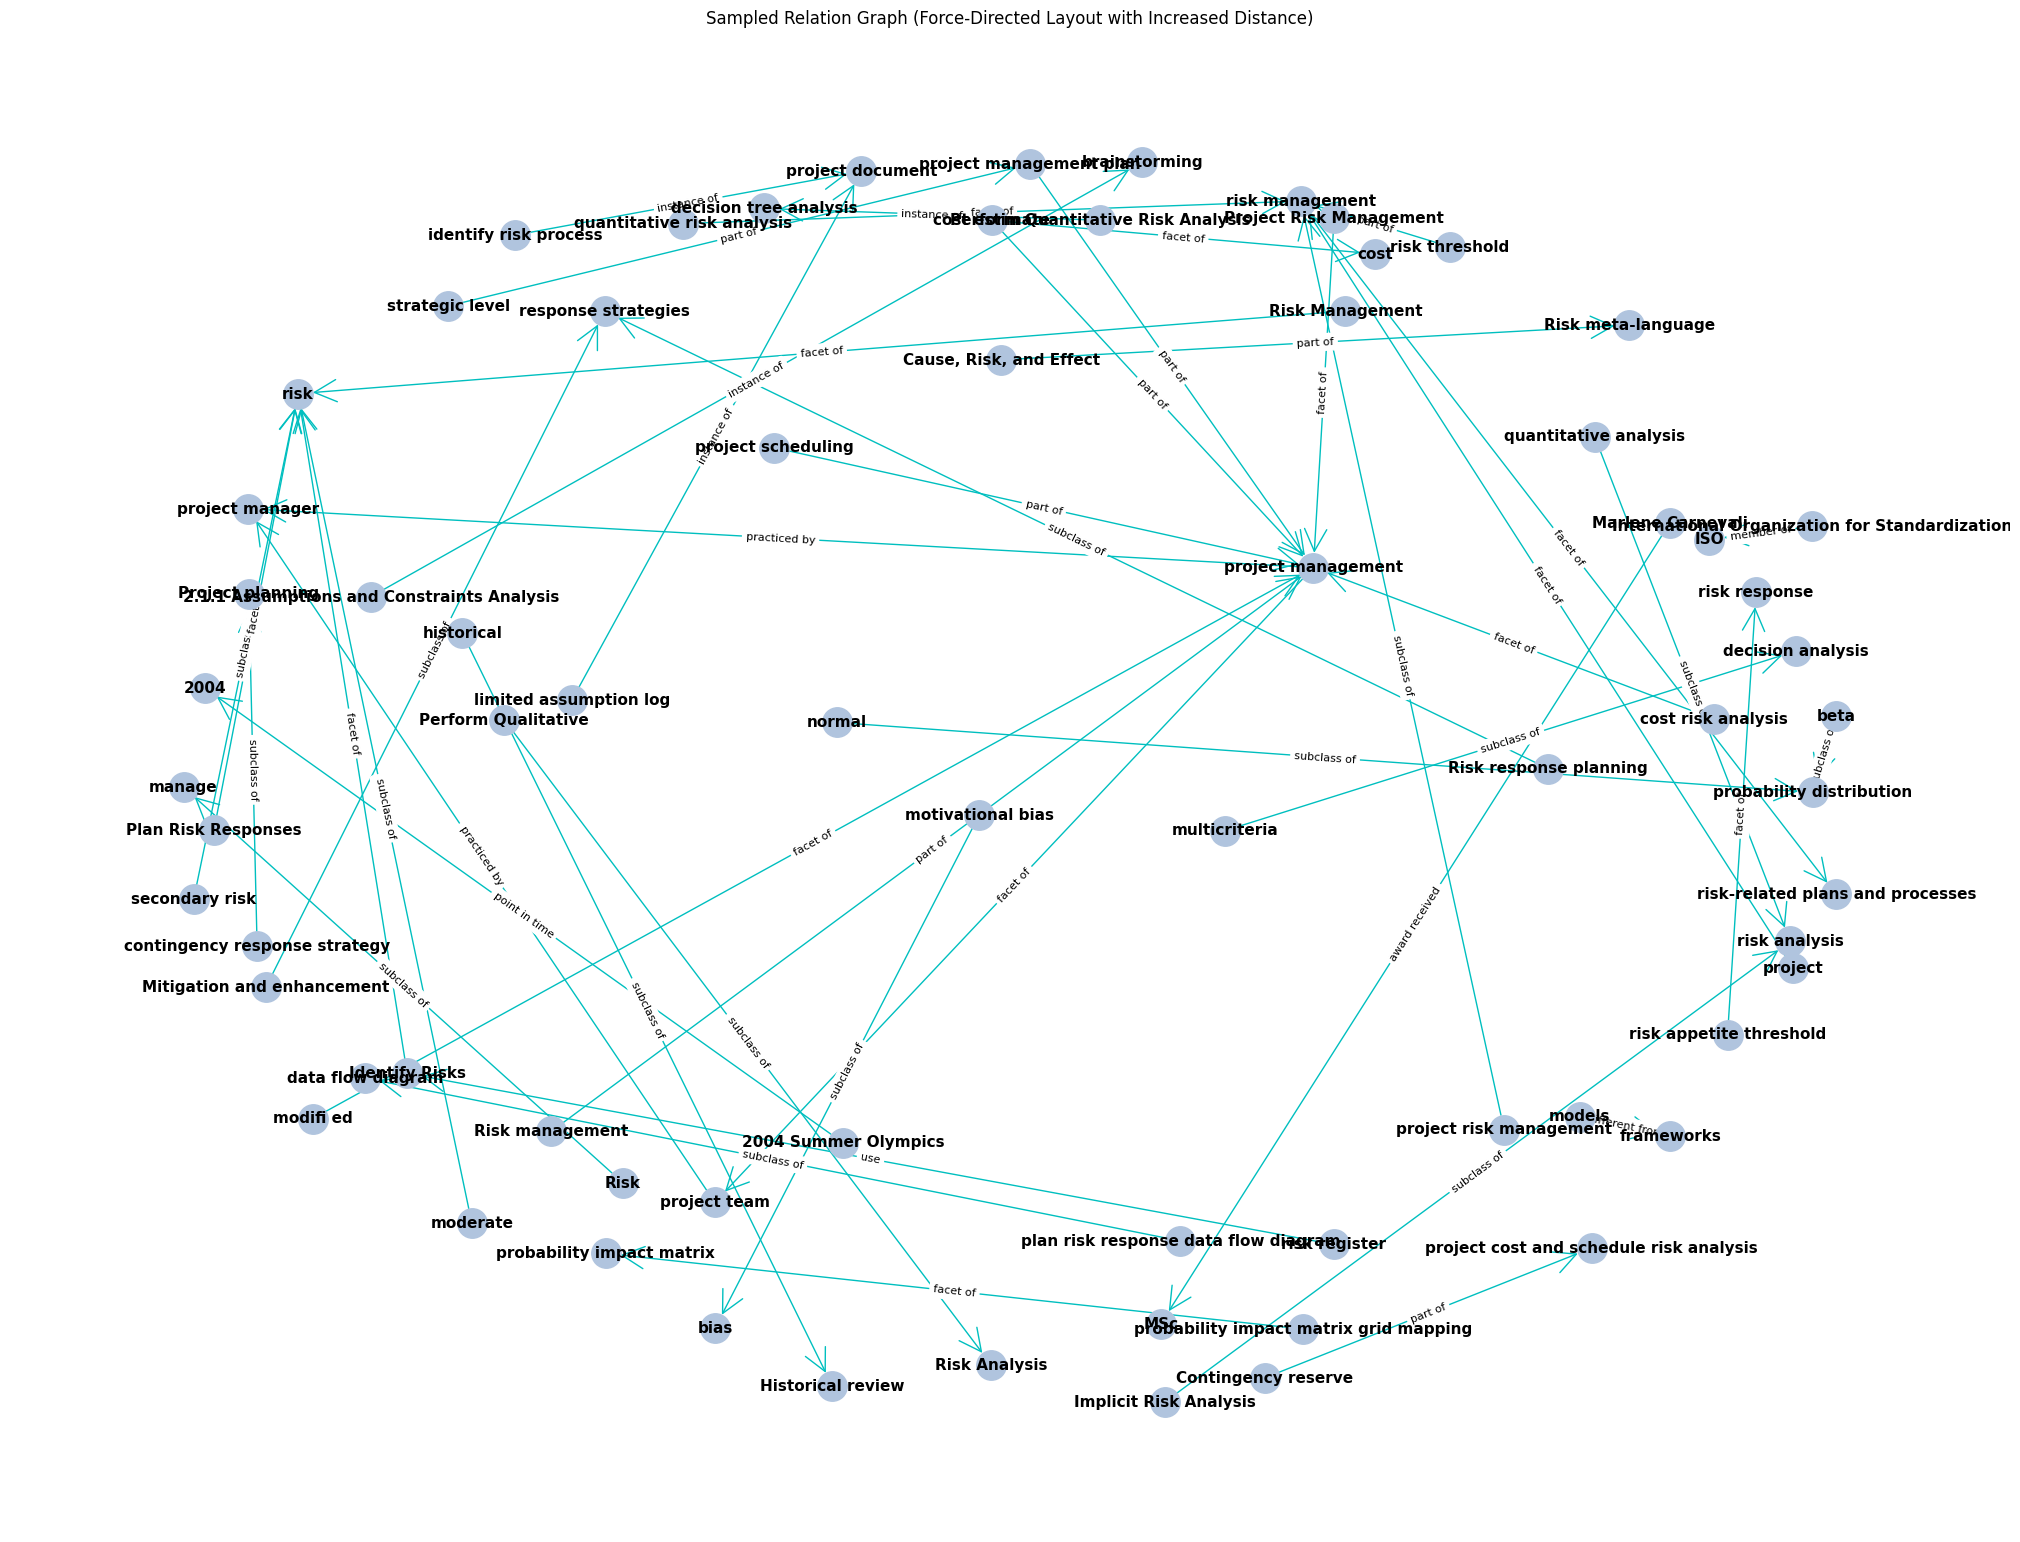

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample a subset of triplets from the DataFrame
sample_size = 50  # Adjust the number of triplets to sample
sampled_triplets = final_triplet_unique.sample(sample_size, random_state=120)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the sampled triplets
for _, row in sampled_triplets.iterrows():
    head = row['head']
    tail = row['tail']
    relation = row['type']

    G.add_node(head)
    G.add_node(tail)
    G.add_edge(head, tail, relation=relation)

# Define node positions using a force-directed layout with increased distance (k)
k = 1  # Adjust this value to control the distance between nodes
pos = nx.spring_layout(G, seed=90, k=k)

# Draw the graph
plt.figure(figsize=(20, 15))
node_labels = {node: node for node in G.nodes()}
edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=450, node_color="lightsteelblue", font_size=11, font_weight="bold",edge_color = 'c', arrowsize=40, arrowstyle='->')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the graph
plt.title("Sampled Relation Graph (Force-Directed Layout with Increased Distance)")
plt.axis("off")
plt.show()

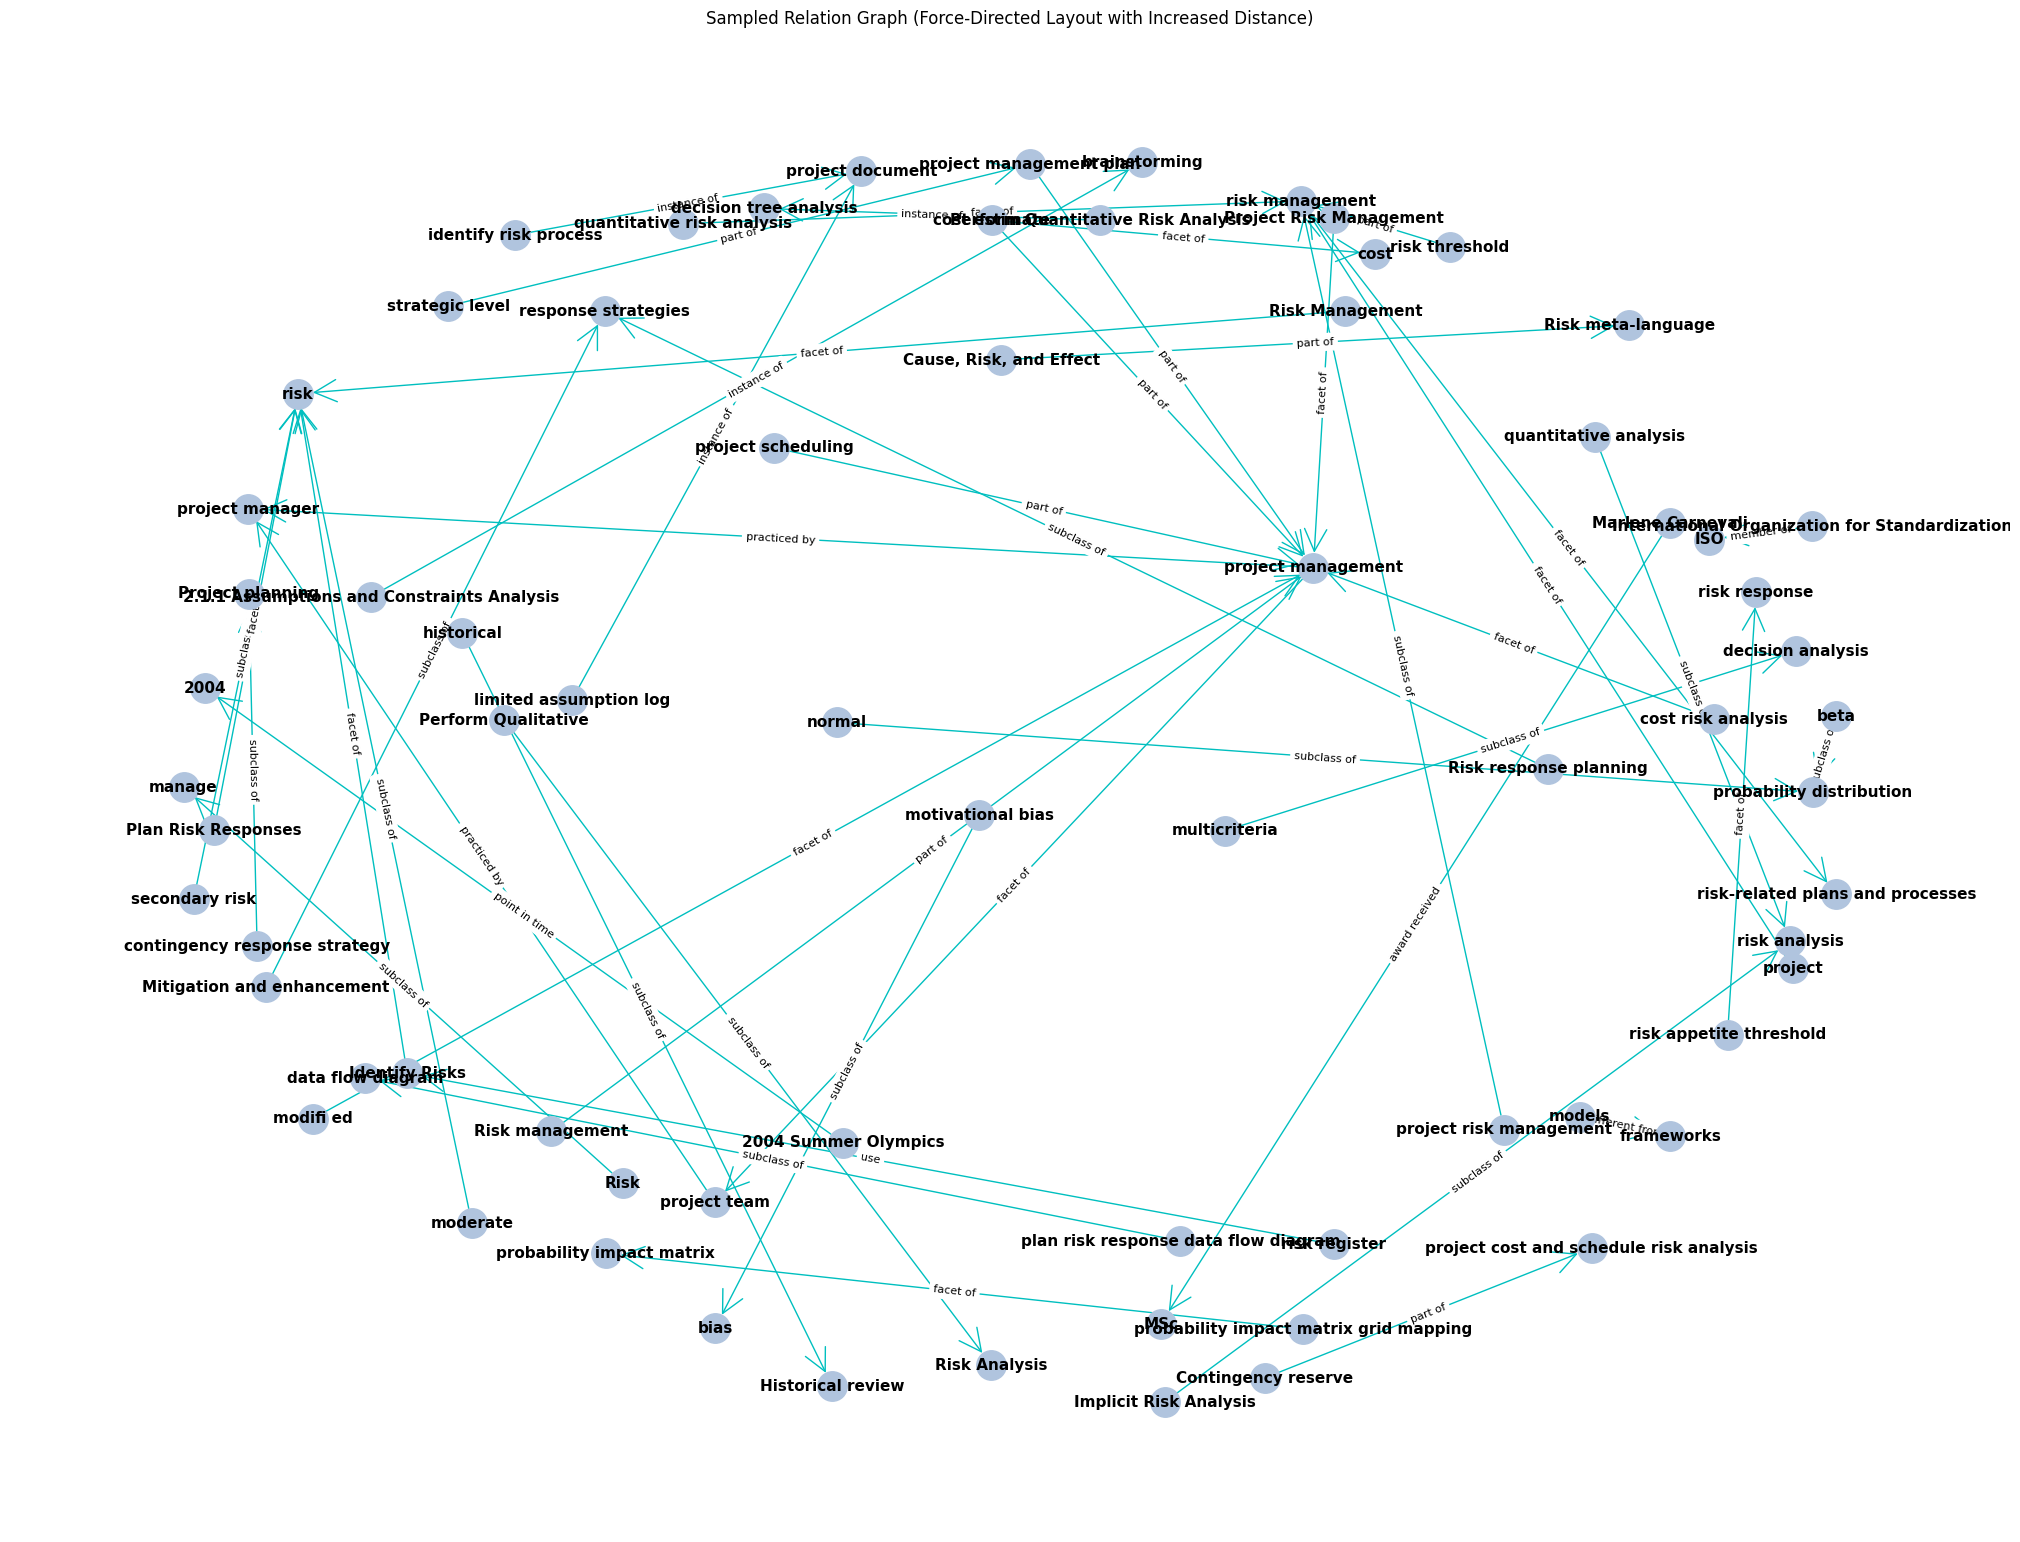

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample a subset of triplets from the DataFrame
sample_size = 50  # Adjust the number of triplets to sample
sampled_triplets = final_triplet_unique.sample(sample_size, random_state=120)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the sampled triplets
for _, row in sampled_triplets.iterrows():
    head = row['head']
    tail = row['tail']
    relation = row['type']

    G.add_node(head)
    G.add_node(tail)
    G.add_edge(head, tail, relation=relation)

# Define node positions using a force-directed layout with increased distance (k)
k = 1  # Adjust this value to control the distance between nodes
pos = nx.spring_layout(G, seed=90, k=k)

# Draw the graph
plt.figure(figsize=(20, 15))
node_labels = {node: node for node in G.nodes()}
edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=450, node_color="lightsteelblue", font_size=11, font_weight="bold",edge_color = 'c', arrowsize=40, arrowstyle='->')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the graph
plt.title("Sampled Relation Graph (Force-Directed Layout with Increased Distance)")
plt.axis("off")
plt.show()

In [ ]:
#!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.0 MB/s eta 0:00:00


In [ ]:
from gensim.models import Word2Vec

# Convert the graph to a list of sentences for Word2Vec
sentences = []
for node in G.nodes():
    neighbors = list(G.neighbors(node))
    sentence = [str(node)] + [str(neighbor) for neighbor in neighbors]
    sentences.append(sentence)

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=64, window=5, min_count=1, sg=1, workers=4)

# Get node embeddings
node_embeddings = {node: model.wv[str(node)] for node in G.nodes()}


In [ ]:
# Get a list of unique node labels
unique_nodes = list(G.nodes)

# Create a mapping from node labels to unique integers
node_to_index = {node: index for index, node in enumerate(unique_nodes)}

In [ ]:
source_nodes = []
target_nodes=[]
# Filter out nodes that do not exist in the graph
source_nodes = [node for node in source_nodes if node in unique_nodes]
target_nodes = [node for node in target_nodes if node in unique_nodes]

# Now, you can map the remaining nodes to their indices
source_indices = [node_to_index[node] for node in source_nodes]
target_indices = [node_to_index[node] for node in target_nodes]

# Create the edge_index tensor
edge_index = torch.tensor([source_indices, target_indices], dtype=torch.long)

In [ ]:
# Create a dictionary to map node names to their embeddings
node_embedding_dict = {node: node_embeddings.get(node, [0.0] * 64) for node in G.nodes()}


In [ ]:
from sklearn.model_selection import train_test_split

# Data Splitting
train_data, test_data = train_test_split(sampled_triplets, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)


In [ ]:
# Convert node names to corresponding embeddings in your dataset
train_data['head'] = train_data['head'].map(node_embedding_dict)
train_data['tail'] = train_data['tail'].map(node_embedding_dict)


In [ ]:
import torch.nn as nn

# Define your GNN model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit the label encoder on the unique values and transform the 'Type_relation' column
train_data['tail_encoded'] = label_encoder.fit_transform(train_data['type'])

# Prepare your data for PyTorch Geometric
x_train = torch.tensor(train_data['head'].tolist(), dtype=torch.float)
y_train = torch.tensor(train_data['tail_encoded'].tolist(), dtype=torch.long)


<ipython-input-110-f9b170d6b3d3>:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  x_train = torch.tensor(train_data['head'].tolist(), dtype=torch.float)


In [ ]:
import torch
from torch_geometric.data import Data
# Create a PyTorch Geometric data object
data = Data(x=x_train, edge_index=edge_index, y=y_train)

In [ ]:
num_classes = len(train_data['tail_encoded'].unique())
num_classes

10

In [ ]:
import torch.nn as nn
from torch_geometric.nn import GCNConv

# Define your GNN model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()  # Use super() without parameters
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instantiate the GNN model
model = GNNModel(input_dim=64, hidden_dim=16, output_dim=10)

# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
data

Data(x=[35, 64], edge_index=[2, 0], y=[35])

In [ ]:
# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)  # Pass data.x and data.edge_index
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()



In [ ]:
# Pass the test data through the model
model.eval()  # Set the model in evaluation mode
with torch.no_grad():
    out = model(data.x, data.edge_index)  # Use the same edge_index as in training

# Get the predicted labels
predicted_labels = out.argmax(dim=1)

# Now you can evaluate the performance of your model using the predicted labels and ground truth labels.
# You can calculate metrics such as accuracy, F1 score, etc.


Recommendation system




In [ ]:
result_concat

Section Title        Chapter  \
0                            11.1 PLAN RISK MANAGEMENT           11.1   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS           11.1   
2                             11.1.1.1 PROJECT CHARTER           11.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN           11.1   
4                           11.1.1.3 PROJECT DOCUMENTS           11.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS           11.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS           11.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES           11.1   
8                             11.1.2.1 EXPERT JUDGMENT           11.1   
9                               11.1.2.2 DATA ANALYSIS           11.1   
10                                   11.1.2.3 MEETINGS           11.1   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS           11.1   
12                       11.1.3.1 RISK MANAGEMENT PLAN           11.1   
13                                 11.2 IDENTIFY RISKS           11.2   
14                       11.2.1 IDENTIFY RISKS: INPUTS           11.2   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN           11.2   
16                          11.2.1.2 PROJECT DOCUMENTS           11.2   
17                                 11.2.1.3 AGREEMENTS           11.2   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION           11.2   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS           11.2   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS           11.2   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES           11.2   
22                            11.2.2.1 EXPERT JUDGMENT           11.2   
23                             11.2.2.2 DATA GATHERING           11.2   
24                              11.2.2.3 DATA ANALYSIS           11.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS           11.2   
26                               11.2.2.5 PROMPT LISTS           11.2   
27                                   11.2.2.6 MEETINGS           11.2   
28                              11.2.3.1 RISK REGISTER           11.2   
29                                11.2.3.2 RISK REPORT           11.2   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES           11.2   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS           11.3   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS           11.3   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN           11.3   
34                          11.3.1.2 PROJECT DOCUMENTS           11.3   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS           11.3   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS           11.3   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...           11.3   
38                            11.3.2.1 EXPERT JUDGMENT           11.3   
39                             11.3.2.2 DATA GATHERING           11.3   
40                              11.3.2.3 DATA ANALYSIS           11.3   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS           11.3   
42                        11.3.2.5 RISK CATEGORIZATION           11.3   
43                        11.3.2.6 DATA REPRESENTATION           11.3   
44                                   11.3.2.7 MEETINGS           11.3   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS           11.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES           11.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS           11.4   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS           11.4   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN           11.4   
50                          11.4.1.2 PROJECT DOCUMENTS           11.4   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS           11.4   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS           11.4   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...           11.4   
54                        

In [ ]:
df_recommendation = result_concat
df_recommendation

Section Title        Chapter  \
0                            11.1 PLAN RISK MANAGEMENT           11.1   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS           11.1   
2                             11.1.1.1 PROJECT CHARTER           11.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN           11.1   
4                           11.1.1.3 PROJECT DOCUMENTS           11.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS           11.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS           11.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES           11.1   
8                             11.1.2.1 EXPERT JUDGMENT           11.1   
9                               11.1.2.2 DATA ANALYSIS           11.1   
10                                   11.1.2.3 MEETINGS           11.1   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS           11.1   
12                       11.1.3.1 RISK MANAGEMENT PLAN           11.1   
13                                 11.2 IDENTIFY RISKS           11.2   
14                       11.2.1 IDENTIFY RISKS: INPUTS           11.2   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN           11.2   
16                          11.2.1.2 PROJECT DOCUMENTS           11.2   
17                                 11.2.1.3 AGREEMENTS           11.2   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION           11.2   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS           11.2   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS           11.2   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES           11.2   
22                            11.2.2.1 EXPERT JUDGMENT           11.2   
23                             11.2.2.2 DATA GATHERING           11.2   
24                              11.2.2.3 DATA ANALYSIS           11.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS           11.2   
26                               11.2.2.5 PROMPT LISTS           11.2   
27                                   11.2.2.6 MEETINGS           11.2   
28                              11.2.3.1 RISK REGISTER           11.2   
29                                11.2.3.2 RISK REPORT           11.2   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES           11.2   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS           11.3   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS           11.3   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN           11.3   
34                          11.3.1.2 PROJECT DOCUMENTS           11.3   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS           11.3   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS           11.3   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...           11.3   
38                            11.3.2.1 EXPERT JUDGMENT           11.3   
39                             11.3.2.2 DATA GATHERING           11.3   
40                              11.3.2.3 DATA ANALYSIS           11.3   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS           11.3   
42                        11.3.2.5 RISK CATEGORIZATION           11.3   
43                        11.3.2.6 DATA REPRESENTATION           11.3   
44                                   11.3.2.7 MEETINGS           11.3   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS           11.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES           11.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS           11.4   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS           11.4   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN           11.4   
50                          11.4.1.2 PROJECT DOCUMENTS           11.4   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS           11.4   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS           11.4   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...           11.4   
54                        

In [ ]:
import numpy as np
import regex as re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import os

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers
from transformers import RobertaTokenizer, TFRobertaModel

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Detect hardware, return appropriate distribution strategy (you can see that it is pretty easy to set up).
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is set (always set in Kaggle)
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())
except ValueError:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print('Number of replicas:', strategy.num_replicas_in_sync)


Number of replicas: 1


In [ ]:

MODEL_NAME = 'roberta-base'
MAX_LEN = 256 # 1st value 256
ARTIFACTS_PATH = '../artifacts/'

BATCH_SIZE = 8 * strategy.num_replicas_in_sync # 1st value 8
EPOCHS = 6 # fist value 3

if not os.path.exists(ARTIFACTS_PATH):
    os.makedirs(ARTIFACTS_PATH)

In [ ]:
df_recommendation.rename(columns={'Section Title': 'Concept'}, inplace=True)

In [ ]:
df_recommendation.head(5)

Concept Chapter  \
0            11.1 PLAN RISK MANAGEMENT    11.1   
1  11.1.1 PLAN RISK MANAGEMENT: INPUTS    11.1   
2             11.1.1.1 PROJECT CHARTER    11.1   
3     11.1.1.2 PROJECT MANAGEMENT PLAN    11.1   
4           11.1.1.3 PROJECT DOCUMENTS    11.1   

                                     Section Content References  \
0  plan risk management process defining conduct ...              
1                                              / / /              
2  described . project charter document highlevel...              
3  described . planning project risk management a...              
4  project document considered input process incl...              

             Figures/Tables  \
0  [figure 112, figure 113]   
1                        []   
2                        []   
3                        []   
4                        []   

                                             summary  \
0  input tool technique output process depicted f...   
1                                              / / /   
2  project charter document highlevel project des...   
3  planning project risk management approved subs...   
4  slaveholder register contains detail project s...   

                                            keywords  \
0  [input, tool, techniqu, output, process, depic...   
1                                          [/, /, /]   
2  [project, charter, document, highlevel, projec...   
3  [plan, project, risk, manag, approv, subsidiar...   
4  [slavehold, regist, contain, detail, project, ...   

                                            synonyms  \
0  [plan, program, programme, hazard, jeopardy, p...   
1                                                 []   
2  [describe, depict, draw, undertaking, project,...   
3  [describe, depict, draw, planning, undertaking...   
4  [undertaking, project, task, labor, document, ...   

                                      Content_Topics PMI Index subtitle  \
0  [(0, 0.27205327), (1, 0.4311087), (2, 0.292663...         4      NaN   
1  [(0, 0.05000039), (1, 0.7999963), (2, 0.050000...        -1      NaN   
2  [(0, 0.12660977), (1, 0.8300838), (2, 0.014529...         4      NaN   
3                                   [(0, 0.9754163)]        22      NaN   
4  [(0, 0.3457303), (1, 0.43898493), (2, 0.205120...         4      NaN   

  Type_relation Concept_of_type_relation          Process_name  
0           use   Decision Tree Analysis  practices techniques  
1   subclass of              uncertainty   plan identification  
2      has part                 response   plan identification  
3       part of       project management   plan identification  
4      has part                 response        plan responses

In [ ]:
df_recommendation.drop(columns=['keywords'], inplace=True)

In [ ]:
df_recommendation

Concept        Chapter  \
0                            11.1 PLAN RISK MANAGEMENT           11.1   
1                  11.1.1 PLAN RISK MANAGEMENT: INPUTS           11.1   
2                             11.1.1.1 PROJECT CHARTER           11.1   
3                     11.1.1.2 PROJECT MANAGEMENT PLAN           11.1   
4                           11.1.1.3 PROJECT DOCUMENTS           11.1   
5            11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS           11.1   
6               11.1.1.5 ORGANIZATIONAL PROCESS ASSETS           11.1   
7    11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES           11.1   
8                             11.1.2.1 EXPERT JUDGMENT           11.1   
9                               11.1.2.2 DATA ANALYSIS           11.1   
10                                   11.1.2.3 MEETINGS           11.1   
11                11.1.3 PLAN RISK MANAGEMENT: OUTPUTS           11.1   
12                       11.1.3.1 RISK MANAGEMENT PLAN           11.1   
13                                 11.2 IDENTIFY RISKS           11.2   
14                       11.2.1 IDENTIFY RISKS: INPUTS           11.2   
15                    11.2.1.1 PROJECT MANAGEMENT PLAN           11.2   
16                          11.2.1.2 PROJECT DOCUMENTS           11.2   
17                                 11.2.1.3 AGREEMENTS           11.2   
18                  11.2.1.4 PROCUREMENT DOCUMENTATION           11.2   
19           11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS           11.2   
20              11.2.1.6 ORGANIZATIONAL PROCESS ASSETS           11.2   
21         11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES           11.2   
22                            11.2.2.1 EXPERT JUDGMENT           11.2   
23                             11.2.2.2 DATA GATHERING           11.2   
24                              11.2.2.3 DATA ANALYSIS           11.2   
25              11.2.2.4 INTERPERSONAL AND TEAM SKILLS           11.2   
26                               11.2.2.5 PROMPT LISTS           11.2   
27                                   11.2.2.6 MEETINGS           11.2   
28                              11.2.3.1 RISK REGISTER           11.2   
29                                11.2.3.2 RISK REPORT           11.2   
30                  11.2.3.3 PROJECT DOCUMENTS UPDATES           11.2   
31              11.3 PERFORM QUALITATIVE RISK ANALYSIS           11.3   
32    11.3.1 PERFORM QUALITATIVE RISK ANALYSIS: INPUTS           11.3   
33                    11.3.1.1 PROJECT MANAGEMENT PLAN           11.3   
34                          11.3.1.2 PROJECT DOCUMENTS           11.3   
35           11.3.1.3 ENTERPRISE ENVIRONMENTAL FACTORS           11.3   
36              11.3.1.4 ORGANIZATIONAL PROCESS ASSETS           11.3   
37   11.3.2 PERFORM QUALITATIVE RISK ANALYSIS: TOOL...           11.3   
38                            11.3.2.1 EXPERT JUDGMENT           11.3   
39                             11.3.2.2 DATA GATHERING           11.3   
40                              11.3.2.3 DATA ANALYSIS           11.3   
41              11.3.2.4 INTERPERSONAL AND TEAM SKILLS           11.3   
42                        11.3.2.5 RISK CATEGORIZATION           11.3   
43                        11.3.2.6 DATA REPRESENTATION           11.3   
44                                   11.3.2.7 MEETINGS           11.3   
45   11.3.3 PERFORM QUALITATIVE RISK ANALYSIS: OUTPUTS           11.3   
46                  11.3.3.1 PROJECT DOCUMENTS UPDATES           11.3   
47             11.4 PERFORM QUANTITATIVE RISK ANALYSIS           11.4   
48   11.4.1 PERFORM QUANTITATIVE RISK ANALYSIS: INPUTS           11.4   
49                    11.4.1.1 PROJECT MANAGEMENT PLAN           11.4   
50                          11.4.1.2 PROJECT DOCUMENTS           11.4   
51           11.4.1.3 ENTERPRISE ENVIRONMENTAL FACTORS           11.4   
52              11.4.1.4 ORGANIZATIONAL PROCESS ASSETS           11.4   
53   11.4.2 PERFORM QUANTITATIVE RISK ANALYSIS: TOO...           11.4   
54                            11

In [ ]:
X_data = df[['summary']].to_numpy().reshape(-1)
y_data = df[['Concept']].to_numpy().reshape(-1)

In [ ]:

def roberta_encode(texts, tokenizer):
    ct = len(texts)
    input_ids = np.ones((ct, MAX_LEN), dtype='int32')
    attention_mask = np.zeros((ct, MAX_LEN), dtype='int32')
    token_type_ids = np.zeros((ct, MAX_LEN), dtype='int32') # Not used in text classification

    for k, text in enumerate(texts):
        # Tokenize
        tok_text = tokenizer.tokenize(text)

        # Truncate and convert tokens to numerical IDs
        enc_text = tokenizer.convert_tokens_to_ids(tok_text[:(MAX_LEN-2)])

        input_length = len(enc_text) + 2
        input_length = input_length if input_length < MAX_LEN else MAX_LEN

        # Add tokens [CLS] and [SEP] at the beginning and the end
        input_ids[k,:input_length] = np.asarray([0] + enc_text + [2], dtype='int32')

        # Set to 1s in the attention input
        attention_mask[k,:input_length] = 1

    return {
        'input_word_ids': input_ids,
        'input_mask': attention_mask,
        'input_type_ids': token_type_ids
    }

In [ ]:
# Transform categories into numbers
Concept_to_id = {}
Concept_to_name = {}

for index, c in enumerate(y_data):
    if c in Concept_to_id:
        Concept_id = Concept_to_id[c]
    else:
        Concept_id = len(Concept_to_id)
        Concept_to_id[c] = Concept_id
        Concept_to_name[Concept_id] = c

    y_data[index] = Concept_id

# Display dictionary
Concept_to_name

{0: '11.1 PLAN RISK MANAGEMENT',
 1: '11.1.1 PLAN RISK MANAGEMENT: INPUTS',
 2: '11.1.1.1 PROJECT CHARTER',
 3: '11.1.1.2 PROJECT MANAGEMENT PLAN',
 4: '11.1.1.3 PROJECT DOCUMENTS',
 5: '11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS',
 6: '11.1.1.5 ORGANIZATIONAL PROCESS ASSETS',
 7: '11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES',
 8: '11.1.2.1 EXPERT JUDGMENT',
 9: '11.1.2.2 DATA ANALYSIS',
 10: '11.1.2.3 MEETINGS',
 11: '11.1.3 PLAN RISK MANAGEMENT: OUTPUTS',
 12: '11.1.3.1 RISK MANAGEMENT PLAN',
 13: '11.2 IDENTIFY RISKS',
 14: '11.2.1 IDENTIFY RISKS: INPUTS',
 15: '11.2.1.1 PROJECT MANAGEMENT PLAN',
 16: '11.2.1.2 PROJECT DOCUMENTS',
 17: '11.2.1.3 AGREEMENTS',
 18: '11.2.1.4 PROCUREMENT DOCUMENTATION',
 19: '11.2.1.5 ENTERPRISE ENVIRONMENTAL FACTORS',
 20: '11.2.1.6 ORGANIZATIONAL PROCESS ASSETS',
 21: '11.2.2 IDENTIFY RISKS: TOOLS AND TECHNIQUES',
 22: '11.2.2.1 EXPERT JUDGMENT',
 23: '11.2.2.2 DATA GATHERING',
 24: '11.2.2.3 DATA ANALYSIS',
 25: '11.2.2.4 INTERPERSONAL AND TEAM

In [ ]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=777)

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained(MODEL_NAME)

In [ ]:

X_train = roberta_encode(X_train, tokenizer)
X_test = roberta_encode(X_test, tokenizer)

y_train = np.asarray(y_train, dtype='int32')
y_test = np.asarray(y_test, dtype='int32')


In [ ]:

def build_model(n_categories):
    with strategy.scope():
        input_word_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_word_ids')
        input_mask = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_mask')
        input_type_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_type_ids')

        # Import RoBERTa model from HuggingFace
        roberta_model = TFRobertaModel.from_pretrained(MODEL_NAME)
        x = roberta_model(input_word_ids, attention_mask=input_mask, token_type_ids=input_type_ids)

        # Huggingface transformers have multiple outputs, embeddings are the first one,
        # so let's slice out the first position
        x = x[0]

        x = tf.keras.layers.Dropout(0.1)(x)
        x = tf.keras.layers.Flatten()(x)
        x = tf.keras.layers.Dense(344, activation='tanh')(x)
        x = tf.keras.layers.Dense(172, activation='tanh')(x)
        x = tf.keras.layers.Dense(n_categories, activation='softmax')(x)

        model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=x)
        model.compile(
            optimizer=tf.keras.optimizers.Adam(lr=1e-5),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        return model

In [ ]:
Concepts = df['Concept'].unique()
n_concepts = len(Concepts)

with strategy.scope():
    model = build_model(n_concepts)
    model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'roberta.embeddings.position_ids', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 256)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                            

In [ ]:
with strategy.scope():
    print('Training...')
    history = model.fit(X_train,
                        y_train,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        verbose=1,
                        validation_data=(X_ test, y_test))


Training...
Epoch 1/6


22/22 [==============================] - 827s 35s/step - loss: 5.3608 - accuracy: 0.0230 - val_loss: 5.7799 - val_accuracy: 0.0455
Epoch 2/6
22/22 [==============================] - 754s 34s/step - loss: 5.5722 - accuracy: 0.0230 - val_loss: 6.0803 - val_accuracy: 0.0227
Epoch 3/6
22/22 [==============================] - 767s 35s/step - loss: 5.3161 - accuracy: 0.0000e+00 - val_loss: 5.5675 - val_accuracy: 0.0455
Epoch 4/6
22/22 [==============================] - 744s 34s/step - loss: 5.3750 - accuracy: 0.0115 - val_loss: 6.3309 - val_accuracy: 0.0227
Epoch 5/6
22/22 [==============================] - 746s 34s/step - loss: 5.2858 - accuracy: 0.0057 - val_loss: 5.3833 - val_accuracy: 0.0000e+00
Epoch 6/6
22/22 [==============================] - 725s 33s/step - loss: 5.4845 - accuracy: 0.0000e+00 - val_loss: 6.3088 - val_accuracy: 0.0227


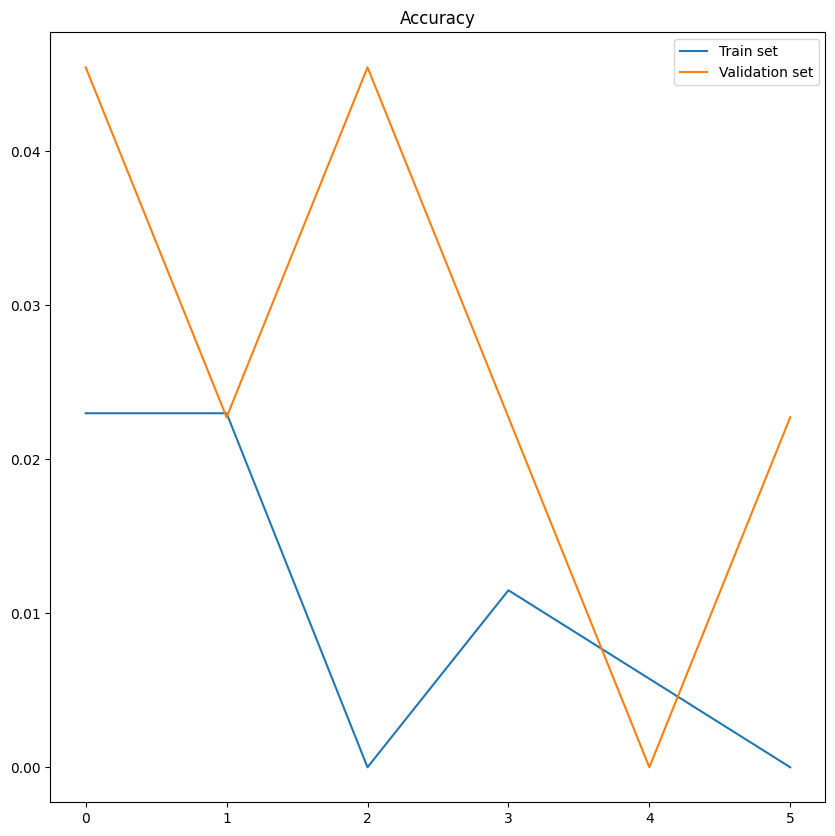

In [ ]:

# This plot will look much better if we train models with more epochs, but anyway here is
plt.figure(figsize=(10, 10))
plt.title('Accuracy')

xaxis = np.arange(len(history.history['accuracy']))
plt.plot(xaxis, history.history['accuracy'], label='Train set')
plt.plot(xaxis, history.history['val_accuracy'], label='Validation set')
plt.legend()

In [ ]:

def plot_confusion_matrix(X_test, y_test, model):
    y_pred = model.predict(X_test)
    y_pred = [np.argmax(i) for i in model.predict(X_test)]

    con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

    con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
    label_names = list(range(len(con_mat_norm)))

    con_mat_df = pd.DataFrame(con_mat_norm,
                              index=label_names,
                              columns=label_names)

    figure = plt.figure(figsize=(10, 10))
    sns.heatmap(con_mat_df, cmap=plt.cm.Blues, annot=True)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


Accuracy: 2.27%


2/2 [==============================] - 52s 14s/step


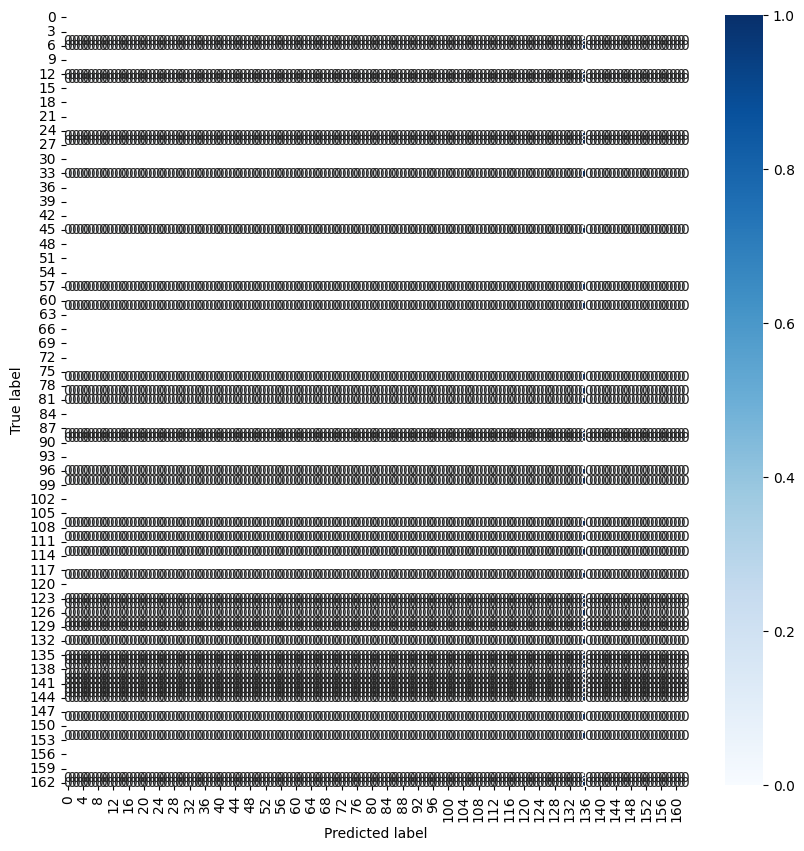

In [ ]:
plot_confusion_matrix(X_test, y_test, model)

# Nouvelle section